# Download and index DEMNAS into ODC

# Table of contents
* [DEMNAS Regions of interest](#DEMNAS-Regions-of-interest)
* [Download and prepare DEMNAS for indexing](#Download-and-prepare-DEMNAS-for-indexing)
* [Index DEMNAS in ODC](#Index-DEMNAS-in-ODC)
* [Load and plot from ODC](#Load-and-plot-from-ODC)


## DEMNAS Regions of interest

DEM Nasional ([DEMNAS](https://tanahair.indonesia.go.id/demnas)) is a combination of multi DEM from TerraSAR-X, IFSAR, ALOS PALSAR, and mass point
with a spatial resolution of 8m. DEMNAS tiles are indexed by their NLP (*Nomor Lembar Peta*: Map Sheet Number) cropped at 1:50k or 1:25k depending on the area. Sulawesi uses 1:25k and filenames of the form `DEMNAS_xxxx-yyz-v1.0.tif` where the `xxxx-yy` is the NLP and `z` a number between `1` and `4` representing the four quadrants of that NLP tile, arranged as: 1: SW, 2: SE, 3: NW, 4: NE. See the [DEMNAS data specifications](https://tanahair.indonesia.go.id/demnas/#/#HowTo).

The regions of interest (ROIS) are defined as a dictionary of `{region name: NLP}`. If needed, download the [NLP maps as an archive of images](https://www.lapakgis.com/2019/04/nomor-lembar-peta-indonesia-kode-area-demnas.html), e.g., by province (*Download per provinsi*)

In [2]:
# Regions of interest from the NLP. Dict of region name and NLP reference
ROIS = {
    "PASANGKAYU": "2014-54",
    "GIMPUBIA": "2014-63",
    "MARTHASARI": "2014-52",
    "LALUNDU": "2014-61",
    "BAMBALOKA": "2014-24",
    "BANGGAIBA": "2014-33",
    "KENTEWUNE": "2014-34",
    "KAROSSA": "2014-22",
    "S. KORONBALO": "2014-31",
    "PEATA": "2014-32",
    "GINTU": "2114-11",
    "BULILI": "2114-12",
    "TENTENA": "2114-21",
    "BUDONGBUDONG": "2013-53",
    "TABOLANG": "2013-54",
    "TENETEKARISAK": "2013-63",
    "TANETE": "2013-64",
    "BANGKO": "2113-43",
    "ONONDOWA": "2113-44",
    "PENDOLO": "2113-53",
    "SALINDU": "2113-54",
    "PAPALANG": "2013-51",
    "KALUMPANG": "2013-52",
    "TAMBINGTAMBING": "2013-61",
    "ENO": "2013-62",
    "MAUMBU": "2113-41",
    "MAIPI": "2113-42",
    "BUYU": "2113-51",
    "MANGKATUNA": "2113-52",
    "MATANO": "2113-61",
    "LAWANGKE": "2113-62",
    "MARGAMULYA": "2213-41",
    "MAMUJU": "2013-14",
    "BALAKALUMPANG": "2013-23",
    "BONEHAU": "2013-24",
    "BATUISI": "2013-33",
    "UMBONG": "2013-34",
    "SABBANG": "2113-13",
    "MASAMBA": "2113-14",
    "BONEBONE": "2113-23",
    "WOTU": "2113-24",
    "MAUU": "2113-33",
    "LEDULEDU": "2113-34",
    "BALLAWA": "2213-13",
    "BUNGKU": "2213-14",
    "TAPALANG": "2013-12",
    "MAMBI": "2013-21",
    "MAMASA": "2013-22",
    "BITUANG": "2013-31",
    "RANTEPAO": "2013-32",
    "PALOPO": "2113-11",
    "AMASANGAN": "2113-12",
    "TOLALA": "2113-31",
    "RAUTA": "2213-11",
    "TOROKUNO UPPE": "2213-12",
    "MALUNDA": "2012-44",
    "TUBBI": "2012-53",
    "SUMARORONG": "2012-54",
    "BUAKAYU": "2012-63",
    "MAKALE": "2012-64",
    "BERINGINJAYA": "2112-43",
    "PADANGSAPA": "2112-44",
    "GALUNGGUNG": "2012-42",
    "WONOMULYO": "2012-51",
    "POLEWALI": "2012-52",
    "KARAWA": "2012-61",
    "BELAJEN": "2012-62",
    "BONELEMO": "2112-41",
    "BELOPA": "2112-42",
    "MAJENE": "2012-14",
    "WONOMULYO1": "2012-23",
    "PARIA": "2012-24",
    "LAMPA": "2012-33",
    "ENREKANG": "2012-34",
    "COMPONG": "2112-13",
    "LAROMPONG": "2112-14",
    "PINRANG": "2012-31",
    "SIDENRENG": "2012-32",
    "ANABANUA": "2112-11",
    "KEERA": "2112-12",
    "PAREPARE": "2011-63",
    "BATUBATU": "2011-64",
    "SENGKANG": "2111-43",
    "PENEKI": "2111-44",
    "BARRU": "2011-61",
    "WATANSOPPENG": "2011-62",
    "ULOE": "2111-41",
    "TOKASENG": "2111-42",
    "SEGERI": "2011-33",
    "LALEEBATA": "2011-34",
    "TACCIPI": "2111-13",
    "WATAMOPONE": "2111-14",
    "BALANGLOMPO": "2011-22",
    "PANGKAJENE": "2011-31",
    "CAMBA": "2011-32",
    "CAMMING": "2111-11",
    "KADAI": "2111-12",
    "UJUNGPANDANG": "2010-54",
    "MAROS": "2010-63",
    "MALINO": "2010-64",
    "BULUPODO": "2110-43",
    "SINJAI": "2110-44",
    "TAKALAR": "2010-52",
    "SAPAYA": "2010-61",
    "MALAKAJI": "2010-62",
    "TANETTE": "2110-41",
    "KASSI": "2110-42",
    "LAIKANG": "2020-24",
    "JENEPONTO": "2010-33",
    "BANTAENG": "2010-34",
    "BULUKUMBA": "2110-13",
    "TANAHBERU": "2110-14",
}

## Download and prepare DEMNAS for indexing

We download, cogify and prepare the ODC metadata for each ROI using a convenience script, which connects directly to the tanahair web site. This requires a configuration file in your home directory named `~/.live_ingester.conf` and containing the at least following fields:
```yaml
drivers:
    demnas:
        config:
            user: <tanahair_login>
            password: <tanahair_password>
            base_dir: '/home/jovyan/dems/demnas'
```
Once ready, we can run the process, which will generate files in the `base_dir` defined in the config.

In [3]:
# Add required dependencies to PYTHONPATH
import sys
sys.path.append("/home/jovyan/git/data-pipeline")

# Increase verbosity
import logging
logging.basicConfig(level=logging.INFO)
for module in ("rasterio", "botocore", "urllib3"):
    logging.getLogger(module).setLevel(logging.WARNING)

# Convenience script
from live_ingester.source_drivers.demnas.definitions.prepare.download_and_prepare_demnas import Demnas

demnas = Demnas()
demnas.prepare(ROIS)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:Demnas:Downloading DEMNAS files for PASANGKAYU (2014-54)
INFO:Demnas: - Skipping already downloaded https://tanahair.indonesia.go.id/unduh/dembat/DEMNAS_2014-541_v1.0.tif
INFO:Demnas: - Skipping already downloaded https://tanahair.indonesia.go.id/unduh/dembat/DEMNAS_2014-542_v1.0.tif
INFO:Demnas:Logged into DEMNAS server
INFO:Demnas: - Skipping already downloaded https://tanahair.indonesia.go.id/unduh/dembat/DEMNAS_2014-544_v1.0.tif
INFO:Demnas:Downloading DEMNAS files for GIMPUBIA (2014-63)
INFO:Demnas: - Skipping already downloaded https://tanahair.indonesia.go.id/unduh/dembat/DEMNAS_2014-631_v1.0.tif
INFO:Demnas: - Skipping already downloaded https://tanahair.indonesia.go.id/unduh/dembat/DEMNAS_2014-632_v1.0.tif
INFO:Demnas: - Skipping already downloaded https://tanahair.indonesia.go.id/unduh/dembat/DEMNAS_2014-633_v1.0.tif
INFO:Demnas: - Skipping already downloaded https://tanahair.indonesia.go.id/unduh/dembat/DEMNAS_2014-634

Preprocessing: /home/jovyan/dems/demnas


INFO:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-333/DEMNAS_2010-333_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-442/DEMNAS_2112-442_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-311/DEMNAS_2014-311_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-222/DEMNAS_2013-222_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-322/DEMNAS_2012-322_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-243/DEMNAS_2014-243_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-333/DEMNAS_2010-333_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-442/DEMNAS_2112-442_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-433/DEMNAS_2112-433_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-222/DEMNAS_2013-222_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-311/DEMNAS_2014-311_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-631/DEMNAS_2013-631_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-243/DEMNAS_2014-243_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-322/DEMNAS_2012-322_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-433/DEMNAS_2112-433_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-631/DEMNAS_2013-631_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-342/DEMNAS_2014-342_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-342/DEMNAS_2014-342_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-224/DEMNAS_2011-224_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-224/DEMNAS_2011-224_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-113/DEMNAS_2113-113_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-113/DEMNAS_2113-113_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-131/DEMNAS_2113-131_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-131/DEMNAS_2113-131_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-333/DEMNAS_2014-333_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-422/DEMNAS_2110-422_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-333/DEMNAS_2014-333_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-144/DEMNAS_2113-144_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-422/DEMNAS_2110-422_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-333/DEMNAS_2113-333_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-144/DEMNAS_2113-144_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-333/DEMNAS_2113-333_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-243/DEMNAS_2113-243_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-243/DEMNAS_2113-243_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-612/DEMNAS_2010-612_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-612/DEMNAS_2010-612_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-234/DEMNAS_2113-234_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-121/DEMNAS_2114-121_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-234/DEMNAS_2113-234_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-121/DEMNAS_2114-121_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-641/DEMNAS_2012-641_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-514/DEMNAS_2013-514_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-123/DEMNAS_2013-123_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-641/DEMNAS_2012-641_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-123/DEMNAS_2013-123_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-514/DEMNAS_2013-514_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-133/DEMNAS_2111-133_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-133/DEMNAS_2111-133_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-332/DEMNAS_2011-332_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-332/DEMNAS_2011-332_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-622/DEMNAS_2013-622_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-622/DEMNAS_2013-622_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-613/DEMNAS_2013-613_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-613/DEMNAS_2013-613_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-524/DEMNAS_2012-524_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-524/DEMNAS_2012-524_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-221/DEMNAS_2014-221_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-221/DEMNAS_2014-221_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-142/DEMNAS_2111-142_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-413/DEMNAS_2110-413_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-413/DEMNAS_2110-413_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-142/DEMNAS_2111-142_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-632/DEMNAS_2012-632_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-632/DEMNAS_2012-632_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-412/DEMNAS_2111-412_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-412/DEMNAS_2111-412_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-443/DEMNAS_2111-443_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-443/DEMNAS_2111-443_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-434/DEMNAS_2111-434_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-434/DEMNAS_2111-434_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-443/DEMNAS_2012-443_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-443/DEMNAS_2012-443_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-621/DEMNAS_2010-621_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-621/DEMNAS_2010-621_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-612/DEMNAS_2113-612_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-612/DEMNAS_2113-612_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-313/DEMNAS_2012-313_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-313/DEMNAS_2012-313_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-421/DEMNAS_2111-421_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-421/DEMNAS_2111-421_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-511/DEMNAS_2012-511_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-511/DEMNAS_2012-511_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-542/DEMNAS_2012-542_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-542/DEMNAS_2012-542_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-533/DEMNAS_2012-533_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-533/DEMNAS_2012-533_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-642/DEMNAS_2011-642_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-642/DEMNAS_2011-642_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-124/DEMNAS_2111-124_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-124/DEMNAS_2111-124_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-634/DEMNAS_2010-634_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-634/DEMNAS_2010-634_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-544/DEMNAS_2113-544_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-544/DEMNAS_2113-544_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-321/DEMNAS_2013-321_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-321/DEMNAS_2013-321_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-312/DEMNAS_2013-312_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-312/DEMNAS_2013-312_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-343/DEMNAS_2013-343_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-343/DEMNAS_2013-343_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-334/DEMNAS_2013-334_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-334/DEMNAS_2013-334_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-341/DEMNAS_2011-341_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-244/DEMNAS_2013-244_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-341/DEMNAS_2011-341_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-244/DEMNAS_2013-244_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-531/DEMNAS_2113-531_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-531/DEMNAS_2113-531_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-644/DEMNAS_2013-644_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-644/DEMNAS_2013-644_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-141/DEMNAS_2112-141_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-141/DEMNAS_2112-141_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-132/DEMNAS_2112-132_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-132/DEMNAS_2112-132_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-111/DEMNAS_2111-111_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-614/DEMNAS_2012-614_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-623/DEMNAS_2012-623_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-614/DEMNAS_2012-614_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-623/DEMNAS_2012-623_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-111/DEMNAS_2111-111_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-522/DEMNAS_2014-522_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-522/DEMNAS_2014-522_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-331/DEMNAS_2012-331_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-544/DEMNAS_2014-544_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-544/DEMNAS_2014-544_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-331/DEMNAS_2012-331_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-143/DEMNAS_2110-143_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-143/DEMNAS_2110-143_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-231/DEMNAS_2013-231_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-231/DEMNAS_2013-231_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-423/DEMNAS_2113-423_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-423/DEMNAS_2113-423_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-634/DEMNAS_2014-634_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-634/DEMNAS_2014-634_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-324/DEMNAS_2012-324_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-324/DEMNAS_2012-324_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-134/DEMNAS_2213-134_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-134/DEMNAS_2213-134_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-143/DEMNAS_2213-143_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-143/DEMNAS_2213-143_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-431/DEMNAS_2110-431_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-431/DEMNAS_2110-431_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-121/DEMNAS_2213-121_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-121/DEMNAS_2213-121_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-134/DEMNAS_2110-134_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-134/DEMNAS_2110-134_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-342/DEMNAS_2113-342_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-621/DEMNAS_2113-621_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-424/DEMNAS_2110-424_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-342/DEMNAS_2113-342_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-432/DEMNAS_2113-432_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-424/DEMNAS_2110-424_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-621/DEMNAS_2113-621_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-432/DEMNAS_2113-432_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-114/DEMNAS_2112-114_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-114/DEMNAS_2112-114_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-323/DEMNAS_2011-323_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-441/DEMNAS_2113-441_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-323/DEMNAS_2011-323_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-441/DEMNAS_2113-441_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-211/DEMNAS_2114-211_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-211/DEMNAS_2114-211_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-344/DEMNAS_2012-344_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-344/DEMNAS_2012-344_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-643/DEMNAS_2010-643_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-643/DEMNAS_2010-643_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-522/DEMNAS_2010-522_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-522/DEMNAS_2010-522_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-612/DEMNAS_2014-612_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-641/DEMNAS_2010-641_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-641/DEMNAS_2010-641_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-612/DEMNAS_2014-612_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-611/DEMNAS_2011-611_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-611/DEMNAS_2011-611_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-544/DEMNAS_2010-544_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-544/DEMNAS_2010-544_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-112/DEMNAS_2213-112_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-112/DEMNAS_2213-112_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-444/DEMNAS_2110-444_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-444/DEMNAS_2110-444_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-141/DEMNAS_2013-141_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-141/DEMNAS_2013-141_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-144/DEMNAS_2111-144_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-523/DEMNAS_2013-523_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-144/DEMNAS_2111-144_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-523/DEMNAS_2013-523_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-213/DEMNAS_2013-213_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-213/DEMNAS_2013-213_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-513/DEMNAS_2113-513_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-513/DEMNAS_2113-513_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-314/DEMNAS_2011-314_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-314/DEMNAS_2011-314_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-522/DEMNAS_2113-522_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-522/DEMNAS_2113-522_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-421/DEMNAS_2012-421_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-421/DEMNAS_2012-421_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-624/DEMNAS_2011-624_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-624/DEMNAS_2011-624_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-521/DEMNAS_2013-521_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-521/DEMNAS_2013-521_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-424/DEMNAS_2112-424_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-424/DEMNAS_2112-424_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-112/DEMNAS_2114-112_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-112/DEMNAS_2114-112_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-633/DEMNAS_2011-633_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-633/DEMNAS_2011-633_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-411/DEMNAS_2112-411_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-411/DEMNAS_2112-411_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-413/DEMNAS_2213-413_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-413/DEMNAS_2213-413_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-123/DEMNAS_2112-123_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-123/DEMNAS_2112-123_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-541/DEMNAS_2013-541_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-541/DEMNAS_2013-541_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-324/DEMNAS_2014-324_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-422/DEMNAS_2112-422_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-324/DEMNAS_2014-324_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-422/DEMNAS_2112-422_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-414/DEMNAS_2113-414_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-414/DEMNAS_2113-414_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-322/DEMNAS_2014-322_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-322/DEMNAS_2014-322_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-311/DEMNAS_2113-311_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-311/DEMNAS_2113-311_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-532/DEMNAS_2013-532_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-532/DEMNAS_2013-532_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-343/DEMNAS_2011-343_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-143/DEMNAS_2013-143_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-343/DEMNAS_2011-343_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-143/DEMNAS_2013-143_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-531/DEMNAS_2012-531_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-531/DEMNAS_2012-531_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-114/DEMNAS_2213-114_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-114/DEMNAS_2213-114_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-642/DEMNAS_2013-642_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-642/DEMNAS_2013-642_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-614/DEMNAS_2113-614_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-614/DEMNAS_2113-614_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-241/DEMNAS_2014-241_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-122/DEMNAS_2111-122_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-241/DEMNAS_2014-241_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-122/DEMNAS_2111-122_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-423/DEMNAS_2012-423_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-423/DEMNAS_2012-423_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-144/DEMNAS_2012-144_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-144/DEMNAS_2012-144_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-412/DEMNAS_2113-412_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-332/DEMNAS_2013-332_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-332/DEMNAS_2013-332_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-412/DEMNAS_2113-412_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-344/DEMNAS_2113-344_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-344/DEMNAS_2113-344_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-632/DEMNAS_2014-632_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-632/DEMNAS_2014-632_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-321/DEMNAS_2011-321_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-321/DEMNAS_2011-321_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-142/DEMNAS_2113-142_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-142/DEMNAS_2113-142_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-622/DEMNAS_2011-622_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-622/DEMNAS_2011-622_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-543/DEMNAS_2013-543_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-612/DEMNAS_2012-612_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-543/DEMNAS_2013-543_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-612/DEMNAS_2012-612_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-331/DEMNAS_2113-331_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-331/DEMNAS_2113-331_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-542/DEMNAS_2010-542_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-542/DEMNAS_2010-542_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-533/DEMNAS_2113-533_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-533/DEMNAS_2113-533_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-121/DEMNAS_2013-121_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-121/DEMNAS_2013-121_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-423/DEMNAS_2111-423_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-423/DEMNAS_2111-423_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-224/DEMNAS_2013-224_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-224/DEMNAS_2013-224_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-132/DEMNAS_2213-132_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-344/DEMNAS_2014-344_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-132/DEMNAS_2213-132_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-344/DEMNAS_2014-344_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-512/DEMNAS_2013-512_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-333/DEMNAS_2012-333_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-512/DEMNAS_2013-512_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-333/DEMNAS_2012-333_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-112/DEMNAS_2112-112_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-112/DEMNAS_2112-112_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-323/DEMNAS_2012-323_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-323/DEMNAS_2012-323_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-522/DEMNAS_2012-522_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-522/DEMNAS_2012-522_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-241/DEMNAS_2113-241_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-241/DEMNAS_2113-241_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-614/DEMNAS_2010-614_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-614/DEMNAS_2010-614_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-624/DEMNAS_2013-624_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-624/DEMNAS_2013-624_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-413/DEMNAS_2112-413_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-413/DEMNAS_2112-413_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-433/DEMNAS_2110-433_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-433/DEMNAS_2110-433_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-211/DEMNAS_2013-211_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-211/DEMNAS_2013-211_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-423/DEMNAS_2110-423_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-323/DEMNAS_2013-323_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-423/DEMNAS_2110-423_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-323/DEMNAS_2013-323_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-123/DEMNAS_2114-123_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-123/DEMNAS_2114-123_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-334/DEMNAS_2011-334_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-334/DEMNAS_2011-334_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-544/DEMNAS_2012-544_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-544/DEMNAS_2012-544_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-313/DEMNAS_2014-313_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-313/DEMNAS_2014-313_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-411/DEMNAS_2213-411_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-411/DEMNAS_2213-411_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-331/DEMNAS_2010-331_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-331/DEMNAS_2010-331_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-441/DEMNAS_2012-441_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-441/DEMNAS_2012-441_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-124/DEMNAS_2013-124_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-124/DEMNAS_2013-124_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-344/DEMNAS_2010-344_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-344/DEMNAS_2010-344_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-511/DEMNAS_2113-511_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-511/DEMNAS_2113-511_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-542/DEMNAS_2014-542_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-542/DEMNAS_2014-542_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-111/DEMNAS_2113-111_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-111/DEMNAS_2113-111_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-133/DEMNAS_2113-133_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-133/DEMNAS_2113-133_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-613/DEMNAS_2011-613_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-613/DEMNAS_2011-613_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-143/DEMNAS_2112-143_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-143/DEMNAS_2112-143_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-242/DEMNAS_2012-242_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-242/DEMNAS_2012-242_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-441/DEMNAS_2111-441_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-441/DEMNAS_2111-441_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-443/DEMNAS_2113-443_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-414/DEMNAS_2111-414_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-443/DEMNAS_2113-443_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-414/DEMNAS_2111-414_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-113/DEMNAS_2111-113_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-113/DEMNAS_2111-113_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-234/DEMNAS_2012-234_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-234/DEMNAS_2012-234_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-431/DEMNAS_2112-431_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-431/DEMNAS_2112-431_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-242/DEMNAS_2013-242_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-242/DEMNAS_2013-242_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-143/DEMNAS_2111-143_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-341/DEMNAS_2013-341_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-143/DEMNAS_2111-143_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-341/DEMNAS_2013-341_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-524/DEMNAS_2113-524_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-524/DEMNAS_2113-524_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-513/DEMNAS_2012-513_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-513/DEMNAS_2012-513_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-312/DEMNAS_2011-312_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-312/DEMNAS_2011-312_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-632/DEMNAS_2010-632_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-632/DEMNAS_2010-632_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-331/DEMNAS_2014-331_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-331/DEMNAS_2014-331_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-223/DEMNAS_2014-223_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-223/DEMNAS_2014-223_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-123/DEMNAS_2213-123_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-123/DEMNAS_2213-123_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-421/DEMNAS_2112-421_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-421/DEMNAS_2112-421_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-314/DEMNAS_2013-314_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-542/DEMNAS_2113-542_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-314/DEMNAS_2013-314_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-542/DEMNAS_2113-542_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-534/DEMNAS_2013-534_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-131/DEMNAS_2111-131_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-534/DEMNAS_2013-534_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-131/DEMNAS_2111-131_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-232/DEMNAS_2113-232_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-232/DEMNAS_2113-232_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-421/DEMNAS_2113-421_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-421/DEMNAS_2113-421_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-124/DEMNAS_2113-124_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-321/DEMNAS_2014-321_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-321/DEMNAS_2014-321_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-124/DEMNAS_2113-124_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-134/DEMNAS_2112-134_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-411/DEMNAS_2110-411_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-134/DEMNAS_2112-134_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-411/DEMNAS_2110-411_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-623/DEMNAS_2113-623_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-623/DEMNAS_2113-623_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-434/DEMNAS_2113-434_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-434/DEMNAS_2113-434_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-611/DEMNAS_2013-611_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-611/DEMNAS_2013-611_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-524/DEMNAS_2010-524_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-524/DEMNAS_2010-524_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-141/DEMNAS_2113-141_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-141/DEMNAS_2113-141_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-621/DEMNAS_2012-621_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-621/DEMNAS_2012-621_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-614/DEMNAS_2014-614_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-614/DEMNAS_2014-614_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-631/DEMNAS_2011-631_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-631/DEMNAS_2011-631_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-643/DEMNAS_2012-643_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-643/DEMNAS_2012-643_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-311/DEMNAS_2012-311_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-311/DEMNAS_2012-311_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-342/DEMNAS_2012-342_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-342/DEMNAS_2012-342_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-422/DEMNAS_2111-422_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-114/DEMNAS_2114-114_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-114/DEMNAS_2114-114_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-422/DEMNAS_2111-422_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-141/DEMNAS_2213-141_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-141/DEMNAS_2213-141_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-644/DEMNAS_2011-644_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-644/DEMNAS_2011-644_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-633/DEMNAS_2013-633_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-233/DEMNAS_2013-233_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-633/DEMNAS_2013-633_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-233/DEMNAS_2013-233_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-121/DEMNAS_2112-121_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-121/DEMNAS_2112-121_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-442/DEMNAS_2110-442_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-442/DEMNAS_2110-442_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-623/DEMNAS_2010-623_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-623/DEMNAS_2010-623_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-313/DEMNAS_2113-313_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-313/DEMNAS_2113-313_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-521/DEMNAS_2012-521_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-521/DEMNAS_2012-521_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-524/DEMNAS_2014-524_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-213/DEMNAS_2114-213_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-213/DEMNAS_2114-213_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-524/DEMNAS_2014-524_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-634/DEMNAS_2012-634_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-634/DEMNAS_2012-634_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-222/DEMNAS_2011-222_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-222/DEMNAS_2011-222_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-142/DEMNAS_2112-142_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-142/DEMNAS_2112-142_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-432/DEMNAS_2111-432_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-343/DEMNAS_2010-343_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-432/DEMNAS_2111-432_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-343/DEMNAS_2010-343_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-322/DEMNAS_2013-322_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-322/DEMNAS_2013-322_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-431/DEMNAS_2111-431_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-431/DEMNAS_2111-431_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-411/DEMNAS_2113-411_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-411/DEMNAS_2113-411_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-241/DEMNAS_2013-241_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-244/DEMNAS_2014-244_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-241/DEMNAS_2013-241_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-244/DEMNAS_2014-244_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-344/DEMNAS_2013-344_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-344/DEMNAS_2013-344_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-522/DEMNAS_2013-522_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-634/DEMNAS_2011-634_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-634/DEMNAS_2011-634_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-522/DEMNAS_2013-522_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-222/DEMNAS_2014-222_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-222/DEMNAS_2014-222_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-331/DEMNAS_2013-331_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-331/DEMNAS_2013-331_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-511/DEMNAS_2013-511_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-511/DEMNAS_2013-511_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-144/DEMNAS_2110-144_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-144/DEMNAS_2110-144_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-642/DEMNAS_2012-642_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-642/DEMNAS_2012-642_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-624/DEMNAS_2012-624_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-624/DEMNAS_2012-624_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-632/DEMNAS_2013-632_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-632/DEMNAS_2013-632_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-423/DEMNAS_2112-423_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-423/DEMNAS_2112-423_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-123/DEMNAS_2113-123_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-123/DEMNAS_2113-123_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-114/DEMNAS_2113-114_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-114/DEMNAS_2113-114_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-412/DEMNAS_2112-412_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-412/DEMNAS_2112-412_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-122/DEMNAS_2213-122_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-144/DEMNAS_2213-144_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-122/DEMNAS_2213-122_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-144/DEMNAS_2213-144_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-444/DEMNAS_2012-444_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-444/DEMNAS_2012-444_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-622/DEMNAS_2010-622_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-622/DEMNAS_2010-622_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-323/DEMNAS_2014-323_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-334/DEMNAS_2113-334_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-323/DEMNAS_2014-323_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-334/DEMNAS_2113-334_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-611/DEMNAS_2012-611_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-611/DEMNAS_2012-611_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-312/DEMNAS_2014-312_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-312/DEMNAS_2014-312_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-324/DEMNAS_2011-324_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-324/DEMNAS_2011-324_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-541/DEMNAS_2014-541_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-541/DEMNAS_2014-541_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-643/DEMNAS_2011-643_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-643/DEMNAS_2011-643_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-633/DEMNAS_2012-633_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-342/DEMNAS_2011-342_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-342/DEMNAS_2011-342_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-633/DEMNAS_2012-633_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-242/DEMNAS_2014-242_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-242/DEMNAS_2014-242_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-131/DEMNAS_2213-131_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-131/DEMNAS_2213-131_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-132/DEMNAS_2113-132_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-132/DEMNAS_2113-132_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-442/DEMNAS_2113-442_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-442/DEMNAS_2113-442_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-523/DEMNAS_2010-523_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-523/DEMNAS_2010-523_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-523/DEMNAS_2014-523_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-523/DEMNAS_2014-523_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-613/DEMNAS_2113-613_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-613/DEMNAS_2113-613_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-541/DEMNAS_2010-541_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-541/DEMNAS_2010-541_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-143/DEMNAS_2113-143_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-613/DEMNAS_2010-613_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-143/DEMNAS_2113-143_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-613/DEMNAS_2010-613_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-523/DEMNAS_2113-523_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-523/DEMNAS_2113-523_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-233/DEMNAS_2012-233_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-233/DEMNAS_2012-233_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-341/DEMNAS_2012-341_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-341/DEMNAS_2012-341_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-424/DEMNAS_2113-424_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-424/DEMNAS_2113-424_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-333/DEMNAS_2011-333_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-333/DEMNAS_2011-333_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-631/DEMNAS_2014-631_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-424/DEMNAS_2111-424_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-424/DEMNAS_2111-424_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-631/DEMNAS_2014-631_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-332/DEMNAS_2012-332_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-332/DEMNAS_2012-332_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-631/DEMNAS_2010-631_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-414/DEMNAS_2213-414_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-631/DEMNAS_2010-631_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-414/DEMNAS_2213-414_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-441/DEMNAS_2110-441_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-441/DEMNAS_2110-441_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-641/DEMNAS_2013-641_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-641/DEMNAS_2013-641_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-413/DEMNAS_2111-413_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-413/DEMNAS_2111-413_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-432/DEMNAS_2110-432_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-432/DEMNAS_2110-432_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-532/DEMNAS_2113-532_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-523/DEMNAS_2012-523_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-523/DEMNAS_2012-523_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-532/DEMNAS_2113-532_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-134/DEMNAS_2111-134_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-434/DEMNAS_2112-434_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-134/DEMNAS_2111-134_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-434/DEMNAS_2112-434_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-142/DEMNAS_2013-142_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-142/DEMNAS_2013-142_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-343/DEMNAS_2113-343_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-343/DEMNAS_2113-343_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-512/DEMNAS_2012-512_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-512/DEMNAS_2012-512_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-111/DEMNAS_2112-111_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-111/DEMNAS_2112-111_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-324/DEMNAS_2013-324_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-324/DEMNAS_2013-324_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-612/DEMNAS_2011-612_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-612/DEMNAS_2011-612_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-414/DEMNAS_2110-414_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-334/DEMNAS_2014-334_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-334/DEMNAS_2014-334_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-414/DEMNAS_2110-414_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-542/DEMNAS_2013-542_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-422/DEMNAS_2012-422_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-542/DEMNAS_2013-542_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-422/DEMNAS_2012-422_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-313/DEMNAS_2013-313_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-112/DEMNAS_2111-112_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-313/DEMNAS_2013-313_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-112/DEMNAS_2111-112_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-442/DEMNAS_2012-442_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-442/DEMNAS_2012-442_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-214/DEMNAS_2013-214_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-214/DEMNAS_2013-214_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-314/DEMNAS_2012-314_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-614/DEMNAS_2013-614_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-614/DEMNAS_2013-614_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-314/DEMNAS_2012-314_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-443/DEMNAS_2112-443_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-443/DEMNAS_2112-443_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-124/DEMNAS_2112-124_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-124/DEMNAS_2112-124_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-311/DEMNAS_2011-311_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-133/DEMNAS_2112-133_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-133/DEMNAS_2112-133_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-311/DEMNAS_2011-311_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-231/DEMNAS_2113-231_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-231/DEMNAS_2113-231_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-144/DEMNAS_2112-144_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-144/DEMNAS_2112-144_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-534/DEMNAS_2012-534_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-534/DEMNAS_2012-534_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-541/DEMNAS_2113-541_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-541/DEMNAS_2113-541_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-621/DEMNAS_2011-621_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-621/DEMNAS_2011-621_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-343/DEMNAS_2014-343_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-343/DEMNAS_2014-343_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-232/DEMNAS_2013-232_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-232/DEMNAS_2013-232_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-221/DEMNAS_2011-221_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-221/DEMNAS_2011-221_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-113/DEMNAS_2114-113_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-113/DEMNAS_2114-113_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-641/DEMNAS_2011-641_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-641/DEMNAS_2011-641_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-433/DEMNAS_2113-433_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-433/DEMNAS_2113-433_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-622/DEMNAS_2113-622_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-622/DEMNAS_2113-622_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-223/DEMNAS_2013-223_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-223/DEMNAS_2013-223_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-244/DEMNAS_2113-244_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-244/DEMNAS_2113-244_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-212/DEMNAS_2114-212_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-212/DEMNAS_2114-212_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-121/DEMNAS_2111-121_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-121/DEMNAS_2111-121_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-312/DEMNAS_2113-312_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-243/DEMNAS_2013-243_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-243/DEMNAS_2013-243_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-312/DEMNAS_2113-312_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-613/DEMNAS_2014-613_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-613/DEMNAS_2014-613_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-644/DEMNAS_2010-644_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-644/DEMNAS_2010-644_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-122/DEMNAS_2114-122_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-122/DEMNAS_2114-122_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-623/DEMNAS_2013-623_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-623/DEMNAS_2013-623_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-113/DEMNAS_2213-113_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-113/DEMNAS_2213-113_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-244/DEMNAS_2012-244_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-244/DEMNAS_2012-244_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-334/DEMNAS_2010-334_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-334/DEMNAS_2010-334_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-524/DEMNAS_2013-524_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-124/DEMNAS_2213-124_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-524/DEMNAS_2013-524_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-124/DEMNAS_2213-124_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-514/DEMNAS_2113-514_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-514/DEMNAS_2113-514_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-422/DEMNAS_2113-422_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-422/DEMNAS_2113-422_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-543/DEMNAS_2012-543_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-543/DEMNAS_2012-543_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-342/DEMNAS_2013-342_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-342/DEMNAS_2013-342_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-642/DEMNAS_2010-642_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-642/DEMNAS_2010-642_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-233/DEMNAS_2113-233_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-521/DEMNAS_2014-521_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-233/DEMNAS_2113-233_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-521/DEMNAS_2014-521_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-214/DEMNAS_2114-214_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-214/DEMNAS_2114-214_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-544/DEMNAS_2013-544_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-544/DEMNAS_2013-544_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-341/DEMNAS_2113-341_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-341/DEMNAS_2113-341_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-311/DEMNAS_2013-311_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-311/DEMNAS_2013-311_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-224/DEMNAS_2014-224_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-224/DEMNAS_2014-224_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-142/DEMNAS_2110-142_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-142/DEMNAS_2110-142_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-413/DEMNAS_2113-413_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-413/DEMNAS_2113-413_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-612/DEMNAS_2013-612_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-612/DEMNAS_2013-612_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-343/DEMNAS_2012-343_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-343/DEMNAS_2012-343_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-444/DEMNAS_2113-444_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-444/DEMNAS_2113-444_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-131/DEMNAS_2112-131_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-131/DEMNAS_2112-131_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-322/DEMNAS_2011-322_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-322/DEMNAS_2011-322_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-622/DEMNAS_2012-622_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-622/DEMNAS_2012-622_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-332/DEMNAS_2113-332_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-332/DEMNAS_2113-332_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-443/DEMNAS_2110-443_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-443/DEMNAS_2110-443_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-314/DEMNAS_2113-314_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-314/DEMNAS_2113-314_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-634/DEMNAS_2013-634_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-634/DEMNAS_2013-634_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-133/DEMNAS_2110-133_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-133/DEMNAS_2110-133_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-521/DEMNAS_2010-521_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-521/DEMNAS_2010-521_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-142/DEMNAS_2213-142_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-142/DEMNAS_2213-142_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-513/DEMNAS_2013-513_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-513/DEMNAS_2013-513_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-433/DEMNAS_2111-433_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-433/DEMNAS_2111-433_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-144/DEMNAS_2013-144_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-144/DEMNAS_2013-144_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-633/DEMNAS_2014-633_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-633/DEMNAS_2014-633_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-111/DEMNAS_2213-111_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-111/DEMNAS_2213-111_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-141/DEMNAS_2111-141_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-141/DEMNAS_2111-141_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-624/DEMNAS_2010-624_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-624/DEMNAS_2010-624_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-414/DEMNAS_2112-414_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-414/DEMNAS_2112-414_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-532/DEMNAS_2012-532_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-424/DEMNAS_2012-424_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-532/DEMNAS_2012-532_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-424/DEMNAS_2012-424_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-534/DEMNAS_2113-534_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-534/DEMNAS_2113-534_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-313/DEMNAS_2011-313_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-313/DEMNAS_2011-313_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-421/DEMNAS_2110-421_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-421/DEMNAS_2110-421_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-344/DEMNAS_2011-344_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-344/DEMNAS_2011-344_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-113/DEMNAS_2112-113_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-314/DEMNAS_2014-314_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-113/DEMNAS_2112-113_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-314/DEMNAS_2014-314_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-333/DEMNAS_2013-333_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-333/DEMNAS_2013-333_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-623/DEMNAS_2011-623_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-623/DEMNAS_2011-623_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-132/DEMNAS_2111-132_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-132/DEMNAS_2111-132_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-122/DEMNAS_2013-122_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-122/DEMNAS_2013-122_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-543/DEMNAS_2010-543_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-543/DEMNAS_2010-543_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-212/DEMNAS_2013-212_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-212/DEMNAS_2013-212_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-134/DEMNAS_2113-134_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-134/DEMNAS_2113-134_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-613/DEMNAS_2012-613_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-613/DEMNAS_2012-613_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-441/DEMNAS_2112-441_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-441/DEMNAS_2112-441_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-412/DEMNAS_2110-412_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-412/DEMNAS_2110-412_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-321/DEMNAS_2012-321_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-321/DEMNAS_2012-321_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-521/DEMNAS_2113-521_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-521/DEMNAS_2113-521_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-111/DEMNAS_2114-111_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-111/DEMNAS_2114-111_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-133/DEMNAS_2213-133_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-133/DEMNAS_2213-133_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-631/DEMNAS_2012-631_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-631/DEMNAS_2012-631_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-341/DEMNAS_2014-341_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-341/DEMNAS_2014-341_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-312/DEMNAS_2012-312_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-312/DEMNAS_2012-312_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-334/DEMNAS_2012-334_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-334/DEMNAS_2012-334_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-332/DEMNAS_2010-332_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-332/DEMNAS_2010-332_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-431/DEMNAS_2113-431_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-431/DEMNAS_2113-431_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-611/DEMNAS_2113-611_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-611/DEMNAS_2113-611_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-242/DEMNAS_2113-242_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-242/DEMNAS_2113-242_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-122/DEMNAS_2112-122_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-122/DEMNAS_2112-122_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-434/DEMNAS_2110-434_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2110-434/DEMNAS_2110-434_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-112/DEMNAS_2113-112_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-112/DEMNAS_2113-112_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-611/DEMNAS_2014-611_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-611/DEMNAS_2014-611_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-633/DEMNAS_2010-633_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-633/DEMNAS_2010-633_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-621/DEMNAS_2013-621_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-621/DEMNAS_2013-621_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-221/DEMNAS_2013-221_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-221/DEMNAS_2013-221_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-412/DEMNAS_2213-412_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2213-412/DEMNAS_2213-412_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-611/DEMNAS_2010-611_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-611/DEMNAS_2010-611_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-512/DEMNAS_2113-512_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-512/DEMNAS_2113-512_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-543/DEMNAS_2113-543_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-543/DEMNAS_2113-543_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-124/DEMNAS_2114-124_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2114-124/DEMNAS_2114-124_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-223/DEMNAS_2011-223_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-223/DEMNAS_2011-223_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-614/DEMNAS_2011-614_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-614/DEMNAS_2011-614_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-114/DEMNAS_2111-114_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-114/DEMNAS_2111-114_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-514/DEMNAS_2012-514_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-514/DEMNAS_2012-514_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-624/DEMNAS_2113-624_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-624/DEMNAS_2113-624_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-442/DEMNAS_2111-442_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-442/DEMNAS_2111-442_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-341/DEMNAS_2010-341_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2010-341/DEMNAS_2010-341_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-432/DEMNAS_2112-432_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2112-432/DEMNAS_2112-432_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-331/DEMNAS_2011-331_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-331/DEMNAS_2011-331_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-632/DEMNAS_2011-632_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2011-632/DEMNAS_2011-632_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-644/DEMNAS_2012-644_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-644/DEMNAS_2012-644_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-541/DEMNAS_2012-541_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2012-541/DEMNAS_2012-541_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-121/DEMNAS_2113-121_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2113-121/DEMNAS_2113-121_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-332/DEMNAS_2014-332_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2014-332/DEMNAS_2014-332_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-411/DEMNAS_2111-411_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-411/DEMNAS_2111-411_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-643/DEMNAS_2013-643_v1.0.tif
Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-234/DEMNAS_2013-234_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-643/DEMNAS_2013-643_v1.0.tif
DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2013-234/DEMNAS_2013-234_v1.0.tif


Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-123/DEMNAS_2111-123_v1.0.tif


DEBUG:preprocess_cogify:Preprocessing: /home/jovyan/dems/demnas/DEMNAS_2111-123/DEMNAS_2111-123_v1.0.tif


Total time: 8.90 seconds


INFO:preprocess_cogify:Total time: 8.90 seconds


Wrote dataset 242d2183-ffb6-5845-bea2-25cb31286930 to /home/jovyan/dems/demnas/DEMNAS_2012-322/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 242d2183-ffb6-5845-bea2-25cb31286930 to /home/jovyan/dems/demnas/DEMNAS_2012-322/odc-metadata.yaml


Wrote dataset e078e526-f9ae-519d-8744-e2a7a30ced27 to /home/jovyan/dems/demnas/DEMNAS_2110-422/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e078e526-f9ae-519d-8744-e2a7a30ced27 to /home/jovyan/dems/demnas/DEMNAS_2110-422/odc-metadata.yaml


Wrote dataset 71352f48-3a4d-55dc-9993-60af173c7ad0 to /home/jovyan/dems/demnas/DEMNAS_2013-123/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 71352f48-3a4d-55dc-9993-60af173c7ad0 to /home/jovyan/dems/demnas/DEMNAS_2013-123/odc-metadata.yaml


Wrote dataset 0921a8fc-2b39-5154-80cf-ae10a00c67c0 to /home/jovyan/dems/demnas/DEMNAS_2111-142/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 0921a8fc-2b39-5154-80cf-ae10a00c67c0 to /home/jovyan/dems/demnas/DEMNAS_2111-142/odc-metadata.yaml


Wrote dataset 0dc6c2f0-be89-5b8f-baac-cc3a072c3914 to /home/jovyan/dems/demnas/DEMNAS_2111-421/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 0dc6c2f0-be89-5b8f-baac-cc3a072c3914 to /home/jovyan/dems/demnas/DEMNAS_2111-421/odc-metadata.yaml


Wrote dataset 26366be1-616c-5f7b-a97a-822ac18f2658 to /home/jovyan/dems/demnas/DEMNAS_2013-321/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 26366be1-616c-5f7b-a97a-822ac18f2658 to /home/jovyan/dems/demnas/DEMNAS_2013-321/odc-metadata.yaml


Wrote dataset 62a9fe15-f161-592e-bf15-570258e923a2 to /home/jovyan/dems/demnas/DEMNAS_2112-141/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 62a9fe15-f161-592e-bf15-570258e923a2 to /home/jovyan/dems/demnas/DEMNAS_2112-141/odc-metadata.yaml


Wrote dataset 19aa1234-6506-5fa6-ac8c-4a91127aea8c to /home/jovyan/dems/demnas/DEMNAS_2110-143/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 19aa1234-6506-5fa6-ac8c-4a91127aea8c to /home/jovyan/dems/demnas/DEMNAS_2110-143/odc-metadata.yaml


Wrote dataset 52e5627a-aee6-508a-a8d8-fe9f52ea1fe3 to /home/jovyan/dems/demnas/DEMNAS_2213-121/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 52e5627a-aee6-508a-a8d8-fe9f52ea1fe3 to /home/jovyan/dems/demnas/DEMNAS_2213-121/odc-metadata.yaml


Wrote dataset f6b9ca45-b10b-58ae-af53-3fe68691f2f1 to /home/jovyan/dems/demnas/DEMNAS_2011-323/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f6b9ca45-b10b-58ae-af53-3fe68691f2f1 to /home/jovyan/dems/demnas/DEMNAS_2011-323/odc-metadata.yaml


Wrote dataset 128e3f26-6808-5b2e-ab29-ab8f10e2128b to /home/jovyan/dems/demnas/DEMNAS_2010-522/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 128e3f26-6808-5b2e-ab29-ab8f10e2128b to /home/jovyan/dems/demnas/DEMNAS_2010-522/odc-metadata.yaml


Wrote dataset c9328494-6d07-51bd-a961-0e295eb56ff0 to /home/jovyan/dems/demnas/DEMNAS_2013-141/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset c9328494-6d07-51bd-a961-0e295eb56ff0 to /home/jovyan/dems/demnas/DEMNAS_2013-141/odc-metadata.yaml


Wrote dataset ef408354-94aa-5199-bbb9-e693019495d2 to /home/jovyan/dems/demnas/DEMNAS_2012-421/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ef408354-94aa-5199-bbb9-e693019495d2 to /home/jovyan/dems/demnas/DEMNAS_2012-421/odc-metadata.yaml


Wrote dataset 78a97d14-5d7c-5aa4-b051-93704079e2fc to /home/jovyan/dems/demnas/DEMNAS_2112-123/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 78a97d14-5d7c-5aa4-b051-93704079e2fc to /home/jovyan/dems/demnas/DEMNAS_2112-123/odc-metadata.yaml


Wrote dataset b0f054c3-1fa6-5bb5-b8e6-2fb48dbe559a to /home/jovyan/dems/demnas/DEMNAS_2013-222/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b0f054c3-1fa6-5bb5-b8e6-2fb48dbe559a to /home/jovyan/dems/demnas/DEMNAS_2013-222/odc-metadata.yaml


Wrote dataset 4aeddff5-b632-5af8-b7da-d52b73a0704b to /home/jovyan/dems/demnas/DEMNAS_2011-224/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4aeddff5-b632-5af8-b7da-d52b73a0704b to /home/jovyan/dems/demnas/DEMNAS_2011-224/odc-metadata.yaml


Wrote dataset 322ccf25-d141-57de-b6e6-874320605832 to /home/jovyan/dems/demnas/DEMNAS_2114-121/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 322ccf25-d141-57de-b6e6-874320605832 to /home/jovyan/dems/demnas/DEMNAS_2114-121/odc-metadata.yaml


Wrote dataset 547b237d-f67c-585c-8071-1176fb066713 to /home/jovyan/dems/demnas/DEMNAS_2014-221/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 547b237d-f67c-585c-8071-1176fb066713 to /home/jovyan/dems/demnas/DEMNAS_2014-221/odc-metadata.yaml


Wrote dataset a7b12885-6562-5527-897c-b8abae60e899 to /home/jovyan/dems/demnas/DEMNAS_2010-621/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a7b12885-6562-5527-897c-b8abae60e899 to /home/jovyan/dems/demnas/DEMNAS_2010-621/odc-metadata.yaml


Wrote dataset a7ece55c-2b9f-58a2-968e-163d50978440 to /home/jovyan/dems/demnas/DEMNAS_2111-124/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a7ece55c-2b9f-58a2-968e-163d50978440 to /home/jovyan/dems/demnas/DEMNAS_2111-124/odc-metadata.yaml


Wrote dataset a93c9fa6-8088-5f2b-ac69-c9c12e8f7338 to /home/jovyan/dems/demnas/DEMNAS_2011-341/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a93c9fa6-8088-5f2b-ac69-c9c12e8f7338 to /home/jovyan/dems/demnas/DEMNAS_2011-341/odc-metadata.yaml


Wrote dataset bb300671-e57c-57ab-bbca-e2aaaf85f441 to /home/jovyan/dems/demnas/DEMNAS_2012-331/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset bb300671-e57c-57ab-bbca-e2aaaf85f441 to /home/jovyan/dems/demnas/DEMNAS_2012-331/odc-metadata.yaml


Wrote dataset 4b2b2f48-a927-52d7-a662-79a300b27344 to /home/jovyan/dems/demnas/DEMNAS_2110-431/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4b2b2f48-a927-52d7-a662-79a300b27344 to /home/jovyan/dems/demnas/DEMNAS_2110-431/odc-metadata.yaml


Wrote dataset fab08942-b7f9-5524-982b-c5078be8e3c5 to /home/jovyan/dems/demnas/DEMNAS_2112-114/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset fab08942-b7f9-5524-982b-c5078be8e3c5 to /home/jovyan/dems/demnas/DEMNAS_2112-114/odc-metadata.yaml


Wrote dataset e2346328-cf17-5b4c-9d02-02cace8e953b to /home/jovyan/dems/demnas/DEMNAS_2011-611/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e2346328-cf17-5b4c-9d02-02cace8e953b to /home/jovyan/dems/demnas/DEMNAS_2011-611/odc-metadata.yaml


Wrote dataset 2e1f8cf9-60e0-5919-a623-348dd6e7d8c3 to /home/jovyan/dems/demnas/DEMNAS_2013-213/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2e1f8cf9-60e0-5919-a623-348dd6e7d8c3 to /home/jovyan/dems/demnas/DEMNAS_2013-213/odc-metadata.yaml


Wrote dataset e9f801f9-9f49-5e31-934b-1bc73bceaa72 to /home/jovyan/dems/demnas/DEMNAS_2114-112/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e9f801f9-9f49-5e31-934b-1bc73bceaa72 to /home/jovyan/dems/demnas/DEMNAS_2114-112/odc-metadata.yaml


Wrote dataset 4a9f3b3c-8f31-51d5-8d2f-b508dd6e02bd to /home/jovyan/dems/demnas/DEMNAS_2113-311/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4a9f3b3c-8f31-51d5-8d2f-b508dd6e02bd to /home/jovyan/dems/demnas/DEMNAS_2113-311/odc-metadata.yaml


Wrote dataset 0d60dfd8-47a2-5f9c-a05b-06c5f3420345 to /home/jovyan/dems/demnas/DEMNAS_2010-333/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 0d60dfd8-47a2-5f9c-a05b-06c5f3420345 to /home/jovyan/dems/demnas/DEMNAS_2010-333/odc-metadata.yaml


Wrote dataset dc212c67-0867-5053-b9a8-68a25af1b030 to /home/jovyan/dems/demnas/DEMNAS_2113-113/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset dc212c67-0867-5053-b9a8-68a25af1b030 to /home/jovyan/dems/demnas/DEMNAS_2113-113/odc-metadata.yaml


Wrote dataset 989fbd5c-7d75-5ef7-8f83-b81b0987a8dc to /home/jovyan/dems/demnas/DEMNAS_2010-612/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 989fbd5c-7d75-5ef7-8f83-b81b0987a8dc to /home/jovyan/dems/demnas/DEMNAS_2010-612/odc-metadata.yaml


Wrote dataset fce15959-e278-5f39-9a23-8c9650ea8fd8 to /home/jovyan/dems/demnas/DEMNAS_2011-332/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset fce15959-e278-5f39-9a23-8c9650ea8fd8 to /home/jovyan/dems/demnas/DEMNAS_2011-332/odc-metadata.yaml


Wrote dataset 08307f53-f239-5251-99ed-c265132a4a44 to /home/jovyan/dems/demnas/DEMNAS_2111-412/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 08307f53-f239-5251-99ed-c265132a4a44 to /home/jovyan/dems/demnas/DEMNAS_2111-412/odc-metadata.yaml


Wrote dataset 9fd26b82-c3cf-57d7-ab98-a6a5d67fcccf to /home/jovyan/dems/demnas/DEMNAS_2012-511/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9fd26b82-c3cf-57d7-ab98-a6a5d67fcccf to /home/jovyan/dems/demnas/DEMNAS_2012-511/odc-metadata.yaml


Wrote dataset 7238be01-11f8-568d-a7d7-12a5752df8f8 to /home/jovyan/dems/demnas/DEMNAS_2013-312/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 7238be01-11f8-568d-a7d7-12a5752df8f8 to /home/jovyan/dems/demnas/DEMNAS_2013-312/odc-metadata.yaml


Wrote dataset 068b041e-e752-5aac-bc7e-cc8c16ee4f0a to /home/jovyan/dems/demnas/DEMNAS_2112-132/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 068b041e-e752-5aac-bc7e-cc8c16ee4f0a to /home/jovyan/dems/demnas/DEMNAS_2112-132/odc-metadata.yaml


Wrote dataset 738c22c4-446a-5c7f-8010-3bea53809066 to /home/jovyan/dems/demnas/DEMNAS_2013-231/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 738c22c4-446a-5c7f-8010-3bea53809066 to /home/jovyan/dems/demnas/DEMNAS_2013-231/odc-metadata.yaml


Wrote dataset c302388c-2444-594d-ac3d-2b7b95bca543 to /home/jovyan/dems/demnas/DEMNAS_2110-134/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset c302388c-2444-594d-ac3d-2b7b95bca543 to /home/jovyan/dems/demnas/DEMNAS_2110-134/odc-metadata.yaml


Wrote dataset f0c03240-1bad-5a53-ad25-5d76f7424fc8 to /home/jovyan/dems/demnas/DEMNAS_2114-211/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f0c03240-1bad-5a53-ad25-5d76f7424fc8 to /home/jovyan/dems/demnas/DEMNAS_2114-211/odc-metadata.yaml


Wrote dataset c09c3372-2f6f-578c-94a8-9faf7c3173bd to /home/jovyan/dems/demnas/DEMNAS_2213-112/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset c09c3372-2f6f-578c-94a8-9faf7c3173bd to /home/jovyan/dems/demnas/DEMNAS_2213-112/odc-metadata.yaml


Wrote dataset 39cce1db-cc62-58ff-b439-5ffd0db8c7b8 to /home/jovyan/dems/demnas/DEMNAS_2011-314/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 39cce1db-cc62-58ff-b439-5ffd0db8c7b8 to /home/jovyan/dems/demnas/DEMNAS_2011-314/odc-metadata.yaml


Wrote dataset 12e53261-b072-581d-bf43-258b38995bd0 to /home/jovyan/dems/demnas/DEMNAS_2112-411/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 12e53261-b072-581d-bf43-258b38995bd0 to /home/jovyan/dems/demnas/DEMNAS_2112-411/odc-metadata.yaml


Wrote dataset 8f9eafab-c4e5-5f05-aa8d-b4e7fa95a751 to /home/jovyan/dems/demnas/DEMNAS_2014-311/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 8f9eafab-c4e5-5f05-aa8d-b4e7fa95a751 to /home/jovyan/dems/demnas/DEMNAS_2014-311/odc-metadata.yaml


Wrote dataset eff10b90-d91b-5fce-9625-a7680fac7dc2 to /home/jovyan/dems/demnas/DEMNAS_2113-131/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset eff10b90-d91b-5fce-9625-a7680fac7dc2 to /home/jovyan/dems/demnas/DEMNAS_2113-131/odc-metadata.yaml


Wrote dataset 8a1b106d-1bb2-5f4a-8d5d-33c19a795392 to /home/jovyan/dems/demnas/DEMNAS_2111-133/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 8a1b106d-1bb2-5f4a-8d5d-33c19a795392 to /home/jovyan/dems/demnas/DEMNAS_2111-133/odc-metadata.yaml


Wrote dataset 9ff9ad04-8fdf-53f9-a104-9b583110c810 to /home/jovyan/dems/demnas/DEMNAS_2110-413/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9ff9ad04-8fdf-53f9-a104-9b583110c810 to /home/jovyan/dems/demnas/DEMNAS_2110-413/odc-metadata.yaml


Wrote dataset 39868bcb-9c56-5c76-8811-910a9201b3ba to /home/jovyan/dems/demnas/DEMNAS_2012-313/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 39868bcb-9c56-5c76-8811-910a9201b3ba to /home/jovyan/dems/demnas/DEMNAS_2012-313/odc-metadata.yaml


Wrote dataset cb2d03ec-6490-55a9-b961-a2abe2b5d428 to /home/jovyan/dems/demnas/DEMNAS_2113-544/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset cb2d03ec-6490-55a9-b961-a2abe2b5d428 to /home/jovyan/dems/demnas/DEMNAS_2113-544/odc-metadata.yaml


Wrote dataset a439ce94-af6c-5d03-bcb4-7ba985cf074d to /home/jovyan/dems/demnas/DEMNAS_2013-644/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a439ce94-af6c-5d03-bcb4-7ba985cf074d to /home/jovyan/dems/demnas/DEMNAS_2013-644/odc-metadata.yaml


Wrote dataset 4e33eef4-77f3-56a5-833e-bf31f9f4b8e3 to /home/jovyan/dems/demnas/DEMNAS_2014-544/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4e33eef4-77f3-56a5-833e-bf31f9f4b8e3 to /home/jovyan/dems/demnas/DEMNAS_2014-544/odc-metadata.yaml


Wrote dataset ed213bf9-f37b-5c4d-8a00-514868fe108b to /home/jovyan/dems/demnas/DEMNAS_2014-634/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ed213bf9-f37b-5c4d-8a00-514868fe108b to /home/jovyan/dems/demnas/DEMNAS_2014-634/odc-metadata.yaml


Wrote dataset 12fe7e4b-c5ba-5ca2-9022-cd2748f8474d to /home/jovyan/dems/demnas/DEMNAS_2113-621/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 12fe7e4b-c5ba-5ca2-9022-cd2748f8474d to /home/jovyan/dems/demnas/DEMNAS_2113-621/odc-metadata.yaml


Wrote dataset cff7c48c-5c0b-57ea-b1a9-c814025d6eb0 to /home/jovyan/dems/demnas/DEMNAS_2010-643/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset cff7c48c-5c0b-57ea-b1a9-c814025d6eb0 to /home/jovyan/dems/demnas/DEMNAS_2010-643/odc-metadata.yaml


Wrote dataset c47d659d-5e07-5123-876b-37b565ccaf7e to /home/jovyan/dems/demnas/DEMNAS_2013-523/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset c47d659d-5e07-5123-876b-37b565ccaf7e to /home/jovyan/dems/demnas/DEMNAS_2013-523/odc-metadata.yaml


Wrote dataset 332189e4-3b52-50e3-aea4-76b7099024d4 to /home/jovyan/dems/demnas/DEMNAS_2112-424/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 332189e4-3b52-50e3-aea4-76b7099024d4 to /home/jovyan/dems/demnas/DEMNAS_2112-424/odc-metadata.yaml


Wrote dataset 0fb1d318-a8ce-5e2f-a611-76a49406ff67 to /home/jovyan/dems/demnas/DEMNAS_2014-324/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 0fb1d318-a8ce-5e2f-a611-76a49406ff67 to /home/jovyan/dems/demnas/DEMNAS_2014-324/odc-metadata.yaml


Wrote dataset 5305a818-1f77-5823-99a2-29e40383b069 to /home/jovyan/dems/demnas/DEMNAS_2014-243/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 5305a818-1f77-5823-99a2-29e40383b069 to /home/jovyan/dems/demnas/DEMNAS_2014-243/odc-metadata.yaml


Wrote dataset 24b5529e-fb43-5920-8c0c-513fd54b44a3 to /home/jovyan/dems/demnas/DEMNAS_2113-144/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 24b5529e-fb43-5920-8c0c-513fd54b44a3 to /home/jovyan/dems/demnas/DEMNAS_2113-144/odc-metadata.yaml


Wrote dataset 530550ef-347c-5fd7-b380-f9b44b9b9ab6 to /home/jovyan/dems/demnas/DEMNAS_2012-641/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 530550ef-347c-5fd7-b380-f9b44b9b9ab6 to /home/jovyan/dems/demnas/DEMNAS_2012-641/odc-metadata.yaml


Wrote dataset 053d4016-cf4b-54be-a2e6-7de2ce100708 to /home/jovyan/dems/demnas/DEMNAS_2012-524/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 053d4016-cf4b-54be-a2e6-7de2ce100708 to /home/jovyan/dems/demnas/DEMNAS_2012-524/odc-metadata.yaml


Wrote dataset a1adf7b9-6233-58ce-9af9-06110883d2bc to /home/jovyan/dems/demnas/DEMNAS_2012-443/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a1adf7b9-6233-58ce-9af9-06110883d2bc to /home/jovyan/dems/demnas/DEMNAS_2012-443/odc-metadata.yaml


Wrote dataset 1ee93f51-1f5c-5363-8104-8e530bbaa93b to /home/jovyan/dems/demnas/DEMNAS_2011-642/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 1ee93f51-1f5c-5363-8104-8e530bbaa93b to /home/jovyan/dems/demnas/DEMNAS_2011-642/odc-metadata.yaml


Wrote dataset eb118288-69e5-5117-a76c-6a6bb4014ffd to /home/jovyan/dems/demnas/DEMNAS_2013-244/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset eb118288-69e5-5117-a76c-6a6bb4014ffd to /home/jovyan/dems/demnas/DEMNAS_2013-244/odc-metadata.yaml


Wrote dataset 2dceb8c0-5679-5136-abd4-ac9319250cd2 to /home/jovyan/dems/demnas/DEMNAS_2014-522/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2dceb8c0-5679-5136-abd4-ac9319250cd2 to /home/jovyan/dems/demnas/DEMNAS_2014-522/odc-metadata.yaml


Wrote dataset 9f9ae652-baa1-58da-afe1-31759c471bd0 to /home/jovyan/dems/demnas/DEMNAS_2113-423/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9f9ae652-baa1-58da-afe1-31759c471bd0 to /home/jovyan/dems/demnas/DEMNAS_2113-423/odc-metadata.yaml


Wrote dataset f3acf26d-5467-5eb0-be88-08440c15a176 to /home/jovyan/dems/demnas/DEMNAS_2113-342/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f3acf26d-5467-5eb0-be88-08440c15a176 to /home/jovyan/dems/demnas/DEMNAS_2113-342/odc-metadata.yaml


Wrote dataset 9a2691d6-c687-584d-a51b-611074cb9765 to /home/jovyan/dems/demnas/DEMNAS_2012-344/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9a2691d6-c687-584d-a51b-611074cb9765 to /home/jovyan/dems/demnas/DEMNAS_2012-344/odc-metadata.yaml


Wrote dataset 7a88aaf6-f56d-599d-8022-5456c8dd0a01 to /home/jovyan/dems/demnas/DEMNAS_2110-444/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 7a88aaf6-f56d-599d-8022-5456c8dd0a01 to /home/jovyan/dems/demnas/DEMNAS_2110-444/odc-metadata.yaml


Wrote dataset c9236e60-6072-50c4-bf1b-1eb7eb465434 to /home/jovyan/dems/demnas/DEMNAS_2011-624/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset c9236e60-6072-50c4-bf1b-1eb7eb465434 to /home/jovyan/dems/demnas/DEMNAS_2011-624/odc-metadata.yaml


Wrote dataset 9a1cac6f-da54-58dd-bfac-65df12b780cc to /home/jovyan/dems/demnas/DEMNAS_2013-541/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9a1cac6f-da54-58dd-bfac-65df12b780cc to /home/jovyan/dems/demnas/DEMNAS_2013-541/odc-metadata.yaml


Wrote dataset 3b8f875b-0319-5fdf-93ed-05a97c3e1fbe to /home/jovyan/dems/demnas/DEMNAS_2112-442/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3b8f875b-0319-5fdf-93ed-05a97c3e1fbe to /home/jovyan/dems/demnas/DEMNAS_2112-442/odc-metadata.yaml


Wrote dataset 7a6db027-feaf-54a0-bd81-9e22cc06cbd0 to /home/jovyan/dems/demnas/DEMNAS_2014-342/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 7a6db027-feaf-54a0-bd81-9e22cc06cbd0 to /home/jovyan/dems/demnas/DEMNAS_2014-342/odc-metadata.yaml


Wrote dataset b3939cd2-bc40-5a96-a6ff-26ecc6b778a2 to /home/jovyan/dems/demnas/DEMNAS_2113-243/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b3939cd2-bc40-5a96-a6ff-26ecc6b778a2 to /home/jovyan/dems/demnas/DEMNAS_2113-243/odc-metadata.yaml


Wrote dataset bb0af494-4eea-5a64-91c4-677e99856f5a to /home/jovyan/dems/demnas/DEMNAS_2013-622/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset bb0af494-4eea-5a64-91c4-677e99856f5a to /home/jovyan/dems/demnas/DEMNAS_2013-622/odc-metadata.yaml


Wrote dataset d8bd5433-a06d-5af2-b12e-f15dc1a6a804 to /home/jovyan/dems/demnas/DEMNAS_2111-443/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset d8bd5433-a06d-5af2-b12e-f15dc1a6a804 to /home/jovyan/dems/demnas/DEMNAS_2111-443/odc-metadata.yaml


Wrote dataset b4d7aa12-987f-598e-a8e3-f102b09a51bc to /home/jovyan/dems/demnas/DEMNAS_2012-542/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b4d7aa12-987f-598e-a8e3-f102b09a51bc to /home/jovyan/dems/demnas/DEMNAS_2012-542/odc-metadata.yaml


Wrote dataset eedd1448-738c-588d-ae02-86c2fc38937c to /home/jovyan/dems/demnas/DEMNAS_2013-343/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset eedd1448-738c-588d-ae02-86c2fc38937c to /home/jovyan/dems/demnas/DEMNAS_2013-343/odc-metadata.yaml


Wrote dataset d8fe3435-59f3-5f8a-af5e-4cbca5801d97 to /home/jovyan/dems/demnas/DEMNAS_2012-623/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset d8fe3435-59f3-5f8a-af5e-4cbca5801d97 to /home/jovyan/dems/demnas/DEMNAS_2012-623/odc-metadata.yaml


Wrote dataset 55c4a4da-0189-5caf-8b76-c578191faeb7 to /home/jovyan/dems/demnas/DEMNAS_2213-143/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 55c4a4da-0189-5caf-8b76-c578191faeb7 to /home/jovyan/dems/demnas/DEMNAS_2213-143/odc-metadata.yaml


Wrote dataset 783c8191-6670-5e21-8601-e7422c66a9c9 to /home/jovyan/dems/demnas/DEMNAS_2113-441/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 783c8191-6670-5e21-8601-e7422c66a9c9 to /home/jovyan/dems/demnas/DEMNAS_2113-441/odc-metadata.yaml


Wrote dataset be92de1d-a4b2-58d1-9bfb-7f10ae874849 to /home/jovyan/dems/demnas/DEMNAS_2010-544/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset be92de1d-a4b2-58d1-9bfb-7f10ae874849 to /home/jovyan/dems/demnas/DEMNAS_2010-544/odc-metadata.yaml


Wrote dataset ac40ad9d-d923-53d1-bd5f-856147650c2d to /home/jovyan/dems/demnas/DEMNAS_2113-522/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ac40ad9d-d923-53d1-bd5f-856147650c2d to /home/jovyan/dems/demnas/DEMNAS_2113-522/odc-metadata.yaml


Wrote dataset 3226fa48-58e0-5269-802e-197f6a90c1b2 to /home/jovyan/dems/demnas/DEMNAS_2213-413/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3226fa48-58e0-5269-802e-197f6a90c1b2 to /home/jovyan/dems/demnas/DEMNAS_2213-413/odc-metadata.yaml


Wrote dataset d220751e-03c5-59f8-9562-359cc159db52 to /home/jovyan/dems/demnas/DEMNAS_2013-532/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset d220751e-03c5-59f8-9562-359cc159db52 to /home/jovyan/dems/demnas/DEMNAS_2013-532/odc-metadata.yaml


Wrote dataset cbfe7206-a0df-5e76-8bd8-c324f5f5079a to /home/jovyan/dems/demnas/DEMNAS_2112-433/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset cbfe7206-a0df-5e76-8bd8-c324f5f5079a to /home/jovyan/dems/demnas/DEMNAS_2112-433/odc-metadata.yaml


Wrote dataset b367ad84-622f-5c11-891c-0283ac71fff7 to /home/jovyan/dems/demnas/DEMNAS_2014-333/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b367ad84-622f-5c11-891c-0283ac71fff7 to /home/jovyan/dems/demnas/DEMNAS_2014-333/odc-metadata.yaml


Wrote dataset e1cbb408-0b63-52ed-a577-03763df7dc22 to /home/jovyan/dems/demnas/DEMNAS_2113-234/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e1cbb408-0b63-52ed-a577-03763df7dc22 to /home/jovyan/dems/demnas/DEMNAS_2113-234/odc-metadata.yaml


Wrote dataset 46e6ce02-af4a-5b98-850a-d71af6f4ef8f to /home/jovyan/dems/demnas/DEMNAS_2013-613/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 46e6ce02-af4a-5b98-850a-d71af6f4ef8f to /home/jovyan/dems/demnas/DEMNAS_2013-613/odc-metadata.yaml


Wrote dataset ba574f99-ed0c-57ee-bf92-3b112313c50d to /home/jovyan/dems/demnas/DEMNAS_2111-434/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ba574f99-ed0c-57ee-bf92-3b112313c50d to /home/jovyan/dems/demnas/DEMNAS_2111-434/odc-metadata.yaml


Wrote dataset 6cc84c51-26a3-5c12-87fe-12a28107c497 to /home/jovyan/dems/demnas/DEMNAS_2012-533/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 6cc84c51-26a3-5c12-87fe-12a28107c497 to /home/jovyan/dems/demnas/DEMNAS_2012-533/odc-metadata.yaml


Wrote dataset 71928a26-3eea-5826-8f75-98e3f2a56df6 to /home/jovyan/dems/demnas/DEMNAS_2013-334/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 71928a26-3eea-5826-8f75-98e3f2a56df6 to /home/jovyan/dems/demnas/DEMNAS_2013-334/odc-metadata.yaml


Wrote dataset a71ed6f6-8c58-50f1-b225-7b59bdb671ab to /home/jovyan/dems/demnas/DEMNAS_2012-614/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a71ed6f6-8c58-50f1-b225-7b59bdb671ab to /home/jovyan/dems/demnas/DEMNAS_2012-614/odc-metadata.yaml


Wrote dataset a65b1f41-3007-5e7b-8047-bcef395dd669 to /home/jovyan/dems/demnas/DEMNAS_2213-134/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a65b1f41-3007-5e7b-8047-bcef395dd669 to /home/jovyan/dems/demnas/DEMNAS_2213-134/odc-metadata.yaml


Wrote dataset 9d89d8d8-b0fc-51b7-ad1f-e420d0810b9f to /home/jovyan/dems/demnas/DEMNAS_2113-432/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9d89d8d8-b0fc-51b7-ad1f-e420d0810b9f to /home/jovyan/dems/demnas/DEMNAS_2113-432/odc-metadata.yaml


Wrote dataset 03c90876-2a40-5c9c-963b-c2a6da1851e9 to /home/jovyan/dems/demnas/DEMNAS_2014-612/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 03c90876-2a40-5c9c-963b-c2a6da1851e9 to /home/jovyan/dems/demnas/DEMNAS_2014-612/odc-metadata.yaml


Wrote dataset 2d5d0b24-fb75-5e38-a597-604c7b6e0545 to /home/jovyan/dems/demnas/DEMNAS_2113-513/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2d5d0b24-fb75-5e38-a597-604c7b6e0545 to /home/jovyan/dems/demnas/DEMNAS_2113-513/odc-metadata.yaml


Wrote dataset 48857db9-7c4d-5813-8ed6-66fcdfbb7cac to /home/jovyan/dems/demnas/DEMNAS_2011-633/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 48857db9-7c4d-5813-8ed6-66fcdfbb7cac to /home/jovyan/dems/demnas/DEMNAS_2011-633/odc-metadata.yaml


Wrote dataset c8998338-0754-5d16-aeab-653782538d7f to /home/jovyan/dems/demnas/DEMNAS_2113-414/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset c8998338-0754-5d16-aeab-653782538d7f to /home/jovyan/dems/demnas/DEMNAS_2113-414/odc-metadata.yaml


Wrote dataset 74b8a379-755b-5892-83dd-9c3609ad0bf1 to /home/jovyan/dems/demnas/DEMNAS_2013-631/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 74b8a379-755b-5892-83dd-9c3609ad0bf1 to /home/jovyan/dems/demnas/DEMNAS_2013-631/odc-metadata.yaml


Wrote dataset 6e52ba68-7715-5426-a4b6-ceebdf0ac379 to /home/jovyan/dems/demnas/DEMNAS_2113-333/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 6e52ba68-7715-5426-a4b6-ceebdf0ac379 to /home/jovyan/dems/demnas/DEMNAS_2113-333/odc-metadata.yaml


Wrote dataset 2dca40f8-7d8f-510c-a3e0-ba983b9f168d to /home/jovyan/dems/demnas/DEMNAS_2013-514/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2dca40f8-7d8f-510c-a3e0-ba983b9f168d to /home/jovyan/dems/demnas/DEMNAS_2013-514/odc-metadata.yaml


Wrote dataset 7d6756b7-f668-59dc-a48a-a3c5d6f59147 to /home/jovyan/dems/demnas/DEMNAS_2012-632/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 7d6756b7-f668-59dc-a48a-a3c5d6f59147 to /home/jovyan/dems/demnas/DEMNAS_2012-632/odc-metadata.yaml


Wrote dataset 7a11931e-ddf4-5c91-b126-c6d6d7329040 to /home/jovyan/dems/demnas/DEMNAS_2113-612/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 7a11931e-ddf4-5c91-b126-c6d6d7329040 to /home/jovyan/dems/demnas/DEMNAS_2113-612/odc-metadata.yaml


Wrote dataset ea5a4361-fb26-559d-a7c6-fa6115b8af27 to /home/jovyan/dems/demnas/DEMNAS_2010-634/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ea5a4361-fb26-559d-a7c6-fa6115b8af27 to /home/jovyan/dems/demnas/DEMNAS_2010-634/odc-metadata.yaml


Wrote dataset a0cfb09f-e009-5d0c-9b43-1f1469d9084c to /home/jovyan/dems/demnas/DEMNAS_2113-531/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a0cfb09f-e009-5d0c-9b43-1f1469d9084c to /home/jovyan/dems/demnas/DEMNAS_2113-531/odc-metadata.yaml


Wrote dataset 393fa753-5bd2-530c-b71d-e9741edd2e33 to /home/jovyan/dems/demnas/DEMNAS_2111-111/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 393fa753-5bd2-530c-b71d-e9741edd2e33 to /home/jovyan/dems/demnas/DEMNAS_2111-111/odc-metadata.yaml


Wrote dataset 3fba2518-0fa2-5f39-9f10-7ff4d46f2e35 to /home/jovyan/dems/demnas/DEMNAS_2012-324/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3fba2518-0fa2-5f39-9f10-7ff4d46f2e35 to /home/jovyan/dems/demnas/DEMNAS_2012-324/odc-metadata.yaml


Wrote dataset 8518a86f-6822-58db-b995-fdea35b9f2ba to /home/jovyan/dems/demnas/DEMNAS_2110-424/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 8518a86f-6822-58db-b995-fdea35b9f2ba to /home/jovyan/dems/demnas/DEMNAS_2110-424/odc-metadata.yaml


Wrote dataset 522d4a0a-37ef-59a5-9519-f1b7d7ca853a to /home/jovyan/dems/demnas/DEMNAS_2010-641/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 522d4a0a-37ef-59a5-9519-f1b7d7ca853a to /home/jovyan/dems/demnas/DEMNAS_2010-641/odc-metadata.yaml


Wrote dataset 6e37695c-083d-5d7c-aa29-1a12931a164a to /home/jovyan/dems/demnas/DEMNAS_2111-144/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 6e37695c-083d-5d7c-aa29-1a12931a164a to /home/jovyan/dems/demnas/DEMNAS_2111-144/odc-metadata.yaml


Wrote dataset 84819272-49fc-50e6-ae4b-8c3d1213e18e to /home/jovyan/dems/demnas/DEMNAS_2013-521/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 84819272-49fc-50e6-ae4b-8c3d1213e18e to /home/jovyan/dems/demnas/DEMNAS_2013-521/odc-metadata.yaml


Wrote dataset dbb1cd7e-4647-5832-a291-1c48dc174bc1 to /home/jovyan/dems/demnas/DEMNAS_2112-422/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset dbb1cd7e-4647-5832-a291-1c48dc174bc1 to /home/jovyan/dems/demnas/DEMNAS_2112-422/odc-metadata.yaml


Wrote dataset 471972c1-107a-5d94-8fcd-ae67ad73936a to /home/jovyan/dems/demnas/DEMNAS_2014-322/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 471972c1-107a-5d94-8fcd-ae67ad73936a to /home/jovyan/dems/demnas/DEMNAS_2014-322/odc-metadata.yaml


Wrote dataset a8056e8d-419e-583b-8371-92595747f9c0 to /home/jovyan/dems/demnas/DEMNAS_2014-241/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a8056e8d-419e-583b-8371-92595747f9c0 to /home/jovyan/dems/demnas/DEMNAS_2014-241/odc-metadata.yaml


Wrote dataset 52f5efb3-8de5-5570-ba9d-8fb03331c827 to /home/jovyan/dems/demnas/DEMNAS_2113-142/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 52f5efb3-8de5-5570-ba9d-8fb03331c827 to /home/jovyan/dems/demnas/DEMNAS_2113-142/odc-metadata.yaml


Wrote dataset b39e6f87-2f15-52cf-a5cd-316f323ac840 to /home/jovyan/dems/demnas/DEMNAS_2111-423/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b39e6f87-2f15-52cf-a5cd-316f323ac840 to /home/jovyan/dems/demnas/DEMNAS_2111-423/odc-metadata.yaml


Wrote dataset f4e748b9-285c-5e8d-96d5-8d6c74fecc2f to /home/jovyan/dems/demnas/DEMNAS_2012-522/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f4e748b9-285c-5e8d-96d5-8d6c74fecc2f to /home/jovyan/dems/demnas/DEMNAS_2012-522/odc-metadata.yaml


Wrote dataset ea568a47-7acb-5ab6-a15c-d7d639a5b646 to /home/jovyan/dems/demnas/DEMNAS_2013-323/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ea568a47-7acb-5ab6-a15c-d7d639a5b646 to /home/jovyan/dems/demnas/DEMNAS_2013-323/odc-metadata.yaml


Wrote dataset 3dde2930-9e87-54a0-b3d7-2bc927716e8c to /home/jovyan/dems/demnas/DEMNAS_2012-441/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3dde2930-9e87-54a0-b3d7-2bc927716e8c to /home/jovyan/dems/demnas/DEMNAS_2012-441/odc-metadata.yaml


Wrote dataset ac2bc9be-e32b-51d3-9617-b153f43f11f6 to /home/jovyan/dems/demnas/DEMNAS_2112-143/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ac2bc9be-e32b-51d3-9617-b153f43f11f6 to /home/jovyan/dems/demnas/DEMNAS_2112-143/odc-metadata.yaml


Wrote dataset 07e77847-348c-5676-a8a3-217ac0eeabd1 to /home/jovyan/dems/demnas/DEMNAS_2013-242/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 07e77847-348c-5676-a8a3-217ac0eeabd1 to /home/jovyan/dems/demnas/DEMNAS_2013-242/odc-metadata.yaml


Wrote dataset 75d51da8-38fb-57a6-ac25-2166b4e94e69 to /home/jovyan/dems/demnas/DEMNAS_2213-123/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 75d51da8-38fb-57a6-ac25-2166b4e94e69 to /home/jovyan/dems/demnas/DEMNAS_2213-123/odc-metadata.yaml


Wrote dataset 76b0e49f-afad-56e6-8f01-3ff9927885ec to /home/jovyan/dems/demnas/DEMNAS_2113-421/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 76b0e49f-afad-56e6-8f01-3ff9927885ec to /home/jovyan/dems/demnas/DEMNAS_2113-421/odc-metadata.yaml


Wrote dataset bcef95f3-486c-5618-9183-6f9dfafd4bac to /home/jovyan/dems/demnas/DEMNAS_2010-524/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset bcef95f3-486c-5618-9183-6f9dfafd4bac to /home/jovyan/dems/demnas/DEMNAS_2010-524/odc-metadata.yaml


Wrote dataset be4135d0-2da6-599c-8702-d2462c5090a2 to /home/jovyan/dems/demnas/DEMNAS_2012-342/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset be4135d0-2da6-599c-8702-d2462c5090a2 to /home/jovyan/dems/demnas/DEMNAS_2012-342/odc-metadata.yaml


Wrote dataset 37f95f7e-cf61-5f44-a882-4151cd6732c7 to /home/jovyan/dems/demnas/DEMNAS_2110-442/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 37f95f7e-cf61-5f44-a882-4151cd6732c7 to /home/jovyan/dems/demnas/DEMNAS_2110-442/odc-metadata.yaml


Wrote dataset 61e60588-3685-507b-aaf6-3931f2c6f686 to /home/jovyan/dems/demnas/DEMNAS_2013-143/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 61e60588-3685-507b-aaf6-3931f2c6f686 to /home/jovyan/dems/demnas/DEMNAS_2013-143/odc-metadata.yaml


Wrote dataset be240184-6871-5c81-be60-ecd8f35f9457 to /home/jovyan/dems/demnas/DEMNAS_2012-423/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset be240184-6871-5c81-be60-ecd8f35f9457 to /home/jovyan/dems/demnas/DEMNAS_2012-423/odc-metadata.yaml


Wrote dataset ab13de6b-7e5d-56f9-a60a-02bc4e8d168e to /home/jovyan/dems/demnas/DEMNAS_2011-622/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ab13de6b-7e5d-56f9-a60a-02bc4e8d168e to /home/jovyan/dems/demnas/DEMNAS_2011-622/odc-metadata.yaml


Wrote dataset 56104da6-cfcf-53dc-bdcd-a948b29238b7 to /home/jovyan/dems/demnas/DEMNAS_2013-224/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 56104da6-cfcf-53dc-bdcd-a948b29238b7 to /home/jovyan/dems/demnas/DEMNAS_2013-224/odc-metadata.yaml


Wrote dataset 9427e3b5-59a8-5e06-acca-17c1b6d73634 to /home/jovyan/dems/demnas/DEMNAS_2113-241/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9427e3b5-59a8-5e06-acca-17c1b6d73634 to /home/jovyan/dems/demnas/DEMNAS_2113-241/odc-metadata.yaml


Wrote dataset 2fd45f74-a537-5378-bb38-49918755315e to /home/jovyan/dems/demnas/DEMNAS_2114-123/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2fd45f74-a537-5378-bb38-49918755315e to /home/jovyan/dems/demnas/DEMNAS_2114-123/odc-metadata.yaml


Wrote dataset 574f17a8-306e-5e94-bfc5-5ce9e0df37aa to /home/jovyan/dems/demnas/DEMNAS_2010-344/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 574f17a8-306e-5e94-bfc5-5ce9e0df37aa to /home/jovyan/dems/demnas/DEMNAS_2010-344/odc-metadata.yaml


Wrote dataset 9eea981d-071a-5865-a863-2bd2ca071f2e to /home/jovyan/dems/demnas/DEMNAS_2111-441/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9eea981d-071a-5865-a863-2bd2ca071f2e to /home/jovyan/dems/demnas/DEMNAS_2111-441/odc-metadata.yaml


Wrote dataset ba3085e5-c907-5130-987c-206c681245f4 to /home/jovyan/dems/demnas/DEMNAS_2013-341/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ba3085e5-c907-5130-987c-206c681245f4 to /home/jovyan/dems/demnas/DEMNAS_2013-341/odc-metadata.yaml


Wrote dataset 84c3eb23-36f5-5b20-a9f5-6a4756e354d9 to /home/jovyan/dems/demnas/DEMNAS_2014-223/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 84c3eb23-36f5-5b20-a9f5-6a4756e354d9 to /home/jovyan/dems/demnas/DEMNAS_2014-223/odc-metadata.yaml


Wrote dataset f1177c48-86c9-58a1-b472-9840ece0f945 to /home/jovyan/dems/demnas/DEMNAS_2113-124/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f1177c48-86c9-58a1-b472-9840ece0f945 to /home/jovyan/dems/demnas/DEMNAS_2113-124/odc-metadata.yaml


Wrote dataset 2dfa6ba3-7ae6-531b-b012-14d8065bcff2 to /home/jovyan/dems/demnas/DEMNAS_2012-621/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2dfa6ba3-7ae6-531b-b012-14d8065bcff2 to /home/jovyan/dems/demnas/DEMNAS_2012-621/odc-metadata.yaml


Wrote dataset b8d43b3f-2836-5901-8d7f-9c022512dadf to /home/jovyan/dems/demnas/DEMNAS_2213-141/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b8d43b3f-2836-5901-8d7f-9c022512dadf to /home/jovyan/dems/demnas/DEMNAS_2213-141/odc-metadata.yaml


Wrote dataset 2dbba955-9810-54a5-b5a3-67ca8cc1ac5e to /home/jovyan/dems/demnas/DEMNAS_2010-623/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2dbba955-9810-54a5-b5a3-67ca8cc1ac5e to /home/jovyan/dems/demnas/DEMNAS_2010-623/odc-metadata.yaml


Wrote dataset eaec980d-9b04-5c13-a67c-5a2e688ff99c to /home/jovyan/dems/demnas/DEMNAS_2011-343/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset eaec980d-9b04-5c13-a67c-5a2e688ff99c to /home/jovyan/dems/demnas/DEMNAS_2011-343/odc-metadata.yaml


Wrote dataset 929e4e14-19d2-5f08-b804-4e1eaed32384 to /home/jovyan/dems/demnas/DEMNAS_2012-144/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 929e4e14-19d2-5f08-b804-4e1eaed32384 to /home/jovyan/dems/demnas/DEMNAS_2012-144/odc-metadata.yaml


Wrote dataset eac72f43-c90f-57c4-a944-f4920aac0598 to /home/jovyan/dems/demnas/DEMNAS_2010-542/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset eac72f43-c90f-57c4-a944-f4920aac0598 to /home/jovyan/dems/demnas/DEMNAS_2010-542/odc-metadata.yaml


Wrote dataset a371ade8-1c7f-5296-ac1a-bb15c1dadd4b to /home/jovyan/dems/demnas/DEMNAS_2012-333/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a371ade8-1c7f-5296-ac1a-bb15c1dadd4b to /home/jovyan/dems/demnas/DEMNAS_2012-333/odc-metadata.yaml


Wrote dataset c193af15-485d-5662-b217-0c29243b735b to /home/jovyan/dems/demnas/DEMNAS_2110-433/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset c193af15-485d-5662-b217-0c29243b735b to /home/jovyan/dems/demnas/DEMNAS_2110-433/odc-metadata.yaml


Wrote dataset 0640f6cb-9b9d-593a-a4b2-32e3303732e6 to /home/jovyan/dems/demnas/DEMNAS_2213-411/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 0640f6cb-9b9d-593a-a4b2-32e3303732e6 to /home/jovyan/dems/demnas/DEMNAS_2213-411/odc-metadata.yaml


Wrote dataset 676bb35e-e4b3-5698-8d0a-de670105ac72 to /home/jovyan/dems/demnas/DEMNAS_2011-613/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 676bb35e-e4b3-5698-8d0a-de670105ac72 to /home/jovyan/dems/demnas/DEMNAS_2011-613/odc-metadata.yaml


Wrote dataset e62d0fd8-8114-5389-bf58-672697177db8 to /home/jovyan/dems/demnas/DEMNAS_2112-431/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e62d0fd8-8114-5389-bf58-672697177db8 to /home/jovyan/dems/demnas/DEMNAS_2112-431/odc-metadata.yaml


Wrote dataset aec961be-d15e-5194-b44f-0b2bf86f70f1 to /home/jovyan/dems/demnas/DEMNAS_2014-331/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset aec961be-d15e-5194-b44f-0b2bf86f70f1 to /home/jovyan/dems/demnas/DEMNAS_2014-331/odc-metadata.yaml


Wrote dataset 259d77a7-d498-51f9-8b52-290b699f103e to /home/jovyan/dems/demnas/DEMNAS_2113-232/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 259d77a7-d498-51f9-8b52-290b699f103e to /home/jovyan/dems/demnas/DEMNAS_2113-232/odc-metadata.yaml


Wrote dataset 026c5d7b-bfd6-5128-90c9-8046ae306c48 to /home/jovyan/dems/demnas/DEMNAS_2013-611/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 026c5d7b-bfd6-5128-90c9-8046ae306c48 to /home/jovyan/dems/demnas/DEMNAS_2013-611/odc-metadata.yaml


Wrote dataset ea720c82-8931-50b7-871b-ad4c57d0c3a0 to /home/jovyan/dems/demnas/DEMNAS_2114-114/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ea720c82-8931-50b7-871b-ad4c57d0c3a0 to /home/jovyan/dems/demnas/DEMNAS_2114-114/odc-metadata.yaml


Wrote dataset 88ba9f92-3561-5e80-a99c-1346fe41916f to /home/jovyan/dems/demnas/DEMNAS_2113-313/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 88ba9f92-3561-5e80-a99c-1346fe41916f to /home/jovyan/dems/demnas/DEMNAS_2113-313/odc-metadata.yaml


Wrote dataset 485a8c0f-a0c9-5eb4-8feb-597bf32032b7 to /home/jovyan/dems/demnas/DEMNAS_2111-432/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 485a8c0f-a0c9-5eb4-8feb-597bf32032b7 to /home/jovyan/dems/demnas/DEMNAS_2111-432/odc-metadata.yaml


Wrote dataset 3fa9462d-d391-510c-99f1-3d44526d89cb to /home/jovyan/dems/demnas/DEMNAS_2012-531/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3fa9462d-d391-510c-99f1-3d44526d89cb to /home/jovyan/dems/demnas/DEMNAS_2012-531/odc-metadata.yaml


Wrote dataset 09526365-63bd-5136-9732-d4f6a082fa59 to /home/jovyan/dems/demnas/DEMNAS_2013-332/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 09526365-63bd-5136-9732-d4f6a082fa59 to /home/jovyan/dems/demnas/DEMNAS_2013-332/odc-metadata.yaml


Wrote dataset 053ceab0-4763-5de4-b594-b57320097313 to /home/jovyan/dems/demnas/DEMNAS_2012-612/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 053ceab0-4763-5de4-b594-b57320097313 to /home/jovyan/dems/demnas/DEMNAS_2012-612/odc-metadata.yaml


Wrote dataset a68f2035-53e3-5757-a2a2-870ffa3f8658 to /home/jovyan/dems/demnas/DEMNAS_2213-132/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a68f2035-53e3-5757-a2a2-870ffa3f8658 to /home/jovyan/dems/demnas/DEMNAS_2213-132/odc-metadata.yaml


Wrote dataset 6765bb6f-ef4f-5854-8810-54e78d5ac4e7 to /home/jovyan/dems/demnas/DEMNAS_2010-614/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 6765bb6f-ef4f-5854-8810-54e78d5ac4e7 to /home/jovyan/dems/demnas/DEMNAS_2010-614/odc-metadata.yaml


Wrote dataset 5789323f-08ba-5802-bc0d-23b7fc5bacc3 to /home/jovyan/dems/demnas/DEMNAS_2011-334/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 5789323f-08ba-5802-bc0d-23b7fc5bacc3 to /home/jovyan/dems/demnas/DEMNAS_2011-334/odc-metadata.yaml


Wrote dataset 2de32545-daf0-519d-8a9d-bb490f00c4f9 to /home/jovyan/dems/demnas/DEMNAS_2113-511/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2de32545-daf0-519d-8a9d-bb490f00c4f9 to /home/jovyan/dems/demnas/DEMNAS_2113-511/odc-metadata.yaml


Wrote dataset bbc417e0-e147-5eeb-937e-6fde7448b36c to /home/jovyan/dems/demnas/DEMNAS_2111-414/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset bbc417e0-e147-5eeb-937e-6fde7448b36c to /home/jovyan/dems/demnas/DEMNAS_2111-414/odc-metadata.yaml


Wrote dataset a4ef4c2c-a769-596c-b79d-2be273309fd5 to /home/jovyan/dems/demnas/DEMNAS_2012-513/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a4ef4c2c-a769-596c-b79d-2be273309fd5 to /home/jovyan/dems/demnas/DEMNAS_2012-513/odc-metadata.yaml


Wrote dataset a7fe1e34-67f7-5420-bdef-820fcf8ebefc to /home/jovyan/dems/demnas/DEMNAS_2013-314/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a7fe1e34-67f7-5420-bdef-820fcf8ebefc to /home/jovyan/dems/demnas/DEMNAS_2013-314/odc-metadata.yaml


Wrote dataset 8badab68-25b8-54c9-900b-69bb930f4a5b to /home/jovyan/dems/demnas/DEMNAS_2112-134/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 8badab68-25b8-54c9-900b-69bb930f4a5b to /home/jovyan/dems/demnas/DEMNAS_2112-134/odc-metadata.yaml


Wrote dataset 0d055811-61e3-58c3-8e4f-e710cdac111d to /home/jovyan/dems/demnas/DEMNAS_2011-631/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 0d055811-61e3-58c3-8e4f-e710cdac111d to /home/jovyan/dems/demnas/DEMNAS_2011-631/odc-metadata.yaml


Wrote dataset abfe8a1a-9748-5725-8965-fda69dd4eb17 to /home/jovyan/dems/demnas/DEMNAS_2013-233/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset abfe8a1a-9748-5725-8965-fda69dd4eb17 to /home/jovyan/dems/demnas/DEMNAS_2013-233/odc-metadata.yaml


Wrote dataset f4ae256d-da47-5c04-9f52-bae24dcc52c4 to /home/jovyan/dems/demnas/DEMNAS_2114-213/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f4ae256d-da47-5c04-9f52-bae24dcc52c4 to /home/jovyan/dems/demnas/DEMNAS_2114-213/odc-metadata.yaml


Wrote dataset ee23a4b4-d0f1-52d3-b46b-2eddd1e429ae to /home/jovyan/dems/demnas/DEMNAS_2213-114/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ee23a4b4-d0f1-52d3-b46b-2eddd1e429ae to /home/jovyan/dems/demnas/DEMNAS_2213-114/odc-metadata.yaml


Wrote dataset 56aab0fd-7049-57f5-8c94-52c509ecf42e to /home/jovyan/dems/demnas/DEMNAS_2113-412/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 56aab0fd-7049-57f5-8c94-52c509ecf42e to /home/jovyan/dems/demnas/DEMNAS_2113-412/odc-metadata.yaml


Wrote dataset 4ec850a1-a6ba-53e2-a1fd-c28caccde37a to /home/jovyan/dems/demnas/DEMNAS_2113-331/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4ec850a1-a6ba-53e2-a1fd-c28caccde37a to /home/jovyan/dems/demnas/DEMNAS_2113-331/odc-metadata.yaml


Wrote dataset a5aa94af-2383-5a66-a7da-0f43aa67a5f0 to /home/jovyan/dems/demnas/DEMNAS_2013-512/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a5aa94af-2383-5a66-a7da-0f43aa67a5f0 to /home/jovyan/dems/demnas/DEMNAS_2013-512/odc-metadata.yaml


Wrote dataset d0cd92c2-5a48-5ee4-98ab-7b6f26186cc6 to /home/jovyan/dems/demnas/DEMNAS_2112-413/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset d0cd92c2-5a48-5ee4-98ab-7b6f26186cc6 to /home/jovyan/dems/demnas/DEMNAS_2112-413/odc-metadata.yaml


Wrote dataset 9fea5bb0-15b8-5010-9136-905cc5f0eeff to /home/jovyan/dems/demnas/DEMNAS_2014-313/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9fea5bb0-15b8-5010-9136-905cc5f0eeff to /home/jovyan/dems/demnas/DEMNAS_2014-313/odc-metadata.yaml


Wrote dataset b47d5654-9ca8-5d05-b59e-efce9a6831e3 to /home/jovyan/dems/demnas/DEMNAS_2113-133/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b47d5654-9ca8-5d05-b59e-efce9a6831e3 to /home/jovyan/dems/demnas/DEMNAS_2113-133/odc-metadata.yaml


Wrote dataset 06f2d322-9151-59f3-8807-91a6d7c1e626 to /home/jovyan/dems/demnas/DEMNAS_2012-234/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 06f2d322-9151-59f3-8807-91a6d7c1e626 to /home/jovyan/dems/demnas/DEMNAS_2012-234/odc-metadata.yaml


Wrote dataset 2f7b290e-ff31-580d-9d4f-d372fa3e3e3d to /home/jovyan/dems/demnas/DEMNAS_2010-632/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2f7b290e-ff31-580d-9d4f-d372fa3e3e3d to /home/jovyan/dems/demnas/DEMNAS_2010-632/odc-metadata.yaml


Wrote dataset 9e540ac9-14bd-5b9a-833c-84ef7bec4cba to /home/jovyan/dems/demnas/DEMNAS_2113-542/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9e540ac9-14bd-5b9a-833c-84ef7bec4cba to /home/jovyan/dems/demnas/DEMNAS_2113-542/odc-metadata.yaml


Wrote dataset 0497a91a-e6b3-5c39-8877-7b30b2b5cfb3 to /home/jovyan/dems/demnas/DEMNAS_2113-623/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 0497a91a-e6b3-5c39-8877-7b30b2b5cfb3 to /home/jovyan/dems/demnas/DEMNAS_2113-623/odc-metadata.yaml


Wrote dataset 98aca09c-0f5f-57d5-88ab-7fdac1458ee1 to /home/jovyan/dems/demnas/DEMNAS_2012-643/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 98aca09c-0f5f-57d5-88ab-7fdac1458ee1 to /home/jovyan/dems/demnas/DEMNAS_2012-643/odc-metadata.yaml


Wrote dataset d1aabe11-0aac-5f42-88f0-9e9709ce10b0 to /home/jovyan/dems/demnas/DEMNAS_2011-644/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset d1aabe11-0aac-5f42-88f0-9e9709ce10b0 to /home/jovyan/dems/demnas/DEMNAS_2011-644/odc-metadata.yaml


Wrote dataset ed5f6eff-ae32-5f56-810f-5964bffa67c1 to /home/jovyan/dems/demnas/DEMNAS_2014-524/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ed5f6eff-ae32-5f56-810f-5964bffa67c1 to /home/jovyan/dems/demnas/DEMNAS_2014-524/odc-metadata.yaml


Wrote dataset bb8e55d0-19ef-5ca1-adb2-8141bb54a055 to /home/jovyan/dems/demnas/DEMNAS_2013-642/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset bb8e55d0-19ef-5ca1-adb2-8141bb54a055 to /home/jovyan/dems/demnas/DEMNAS_2013-642/odc-metadata.yaml


Wrote dataset bedfb7d1-d0c7-508f-90b5-c80721b000a6 to /home/jovyan/dems/demnas/DEMNAS_2113-344/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset bedfb7d1-d0c7-508f-90b5-c80721b000a6 to /home/jovyan/dems/demnas/DEMNAS_2113-344/odc-metadata.yaml


Wrote dataset 7fadd3f0-5990-54b9-8eb0-e86bfe223944 to /home/jovyan/dems/demnas/DEMNAS_2013-543/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 7fadd3f0-5990-54b9-8eb0-e86bfe223944 to /home/jovyan/dems/demnas/DEMNAS_2013-543/odc-metadata.yaml


Wrote dataset b20cdccf-0a43-56bd-a5ff-7d85a4461952 to /home/jovyan/dems/demnas/DEMNAS_2014-344/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b20cdccf-0a43-56bd-a5ff-7d85a4461952 to /home/jovyan/dems/demnas/DEMNAS_2014-344/odc-metadata.yaml


Wrote dataset 11f2a005-f441-51a2-b606-c7b9c8a49c13 to /home/jovyan/dems/demnas/DEMNAS_2013-624/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 11f2a005-f441-51a2-b606-c7b9c8a49c13 to /home/jovyan/dems/demnas/DEMNAS_2013-624/odc-metadata.yaml


Wrote dataset 1e1cd864-5125-5cec-b1d1-d885f12f0278 to /home/jovyan/dems/demnas/DEMNAS_2012-544/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 1e1cd864-5125-5cec-b1d1-d885f12f0278 to /home/jovyan/dems/demnas/DEMNAS_2012-544/odc-metadata.yaml


Wrote dataset f47ec7f2-2f68-58d4-bf02-fff22d7b973e to /home/jovyan/dems/demnas/DEMNAS_2014-542/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f47ec7f2-2f68-58d4-bf02-fff22d7b973e to /home/jovyan/dems/demnas/DEMNAS_2014-542/odc-metadata.yaml


Wrote dataset bb2b66d9-bd4f-55e0-82cd-2c693a20dde9 to /home/jovyan/dems/demnas/DEMNAS_2113-443/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset bb2b66d9-bd4f-55e0-82cd-2c693a20dde9 to /home/jovyan/dems/demnas/DEMNAS_2113-443/odc-metadata.yaml


Wrote dataset 6e809a93-5eea-516e-953d-f508915ab361 to /home/jovyan/dems/demnas/DEMNAS_2113-524/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 6e809a93-5eea-516e-953d-f508915ab361 to /home/jovyan/dems/demnas/DEMNAS_2113-524/odc-metadata.yaml


Wrote dataset ef3fbf60-c9ab-5b85-b12a-f014e337e929 to /home/jovyan/dems/demnas/DEMNAS_2013-534/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ef3fbf60-c9ab-5b85-b12a-f014e337e929 to /home/jovyan/dems/demnas/DEMNAS_2013-534/odc-metadata.yaml


Wrote dataset 3da94503-6602-5df5-8d38-cf284fc59467 to /home/jovyan/dems/demnas/DEMNAS_2113-434/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3da94503-6602-5df5-8d38-cf284fc59467 to /home/jovyan/dems/demnas/DEMNAS_2113-434/odc-metadata.yaml


Wrote dataset 2d2af04a-fc9a-5d46-86dc-1360a4a947d7 to /home/jovyan/dems/demnas/DEMNAS_2014-614/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2d2af04a-fc9a-5d46-86dc-1360a4a947d7 to /home/jovyan/dems/demnas/DEMNAS_2014-614/odc-metadata.yaml


Wrote dataset 1de41df6-04bb-5510-9c30-5027d418db2e to /home/jovyan/dems/demnas/DEMNAS_2013-633/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 1de41df6-04bb-5510-9c30-5027d418db2e to /home/jovyan/dems/demnas/DEMNAS_2013-633/odc-metadata.yaml


Wrote dataset 50da8379-e8b7-508c-9633-4f18a5181d73 to /home/jovyan/dems/demnas/DEMNAS_2012-634/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 50da8379-e8b7-508c-9633-4f18a5181d73 to /home/jovyan/dems/demnas/DEMNAS_2012-634/odc-metadata.yaml


Wrote dataset d086f511-09da-5ceb-924a-0fb068c6b3b8 to /home/jovyan/dems/demnas/DEMNAS_2113-614/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset d086f511-09da-5ceb-924a-0fb068c6b3b8 to /home/jovyan/dems/demnas/DEMNAS_2113-614/odc-metadata.yaml


Wrote dataset 5b031944-2514-5bb4-ad8f-00fbd9bdf0a7 to /home/jovyan/dems/demnas/DEMNAS_2014-632/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 5b031944-2514-5bb4-ad8f-00fbd9bdf0a7 to /home/jovyan/dems/demnas/DEMNAS_2014-632/odc-metadata.yaml


Wrote dataset 05c641f8-6afa-5960-8eea-ce810b7f7d0e to /home/jovyan/dems/demnas/DEMNAS_2113-533/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 05c641f8-6afa-5960-8eea-ce810b7f7d0e to /home/jovyan/dems/demnas/DEMNAS_2113-533/odc-metadata.yaml


Wrote dataset 48e332f7-04a9-5c93-8c80-49b79c8e7ba1 to /home/jovyan/dems/demnas/DEMNAS_2112-112/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 48e332f7-04a9-5c93-8c80-49b79c8e7ba1 to /home/jovyan/dems/demnas/DEMNAS_2112-112/odc-metadata.yaml


Wrote dataset 4ded6d06-f88b-5490-bc52-13a21af815b6 to /home/jovyan/dems/demnas/DEMNAS_2013-211/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4ded6d06-f88b-5490-bc52-13a21af815b6 to /home/jovyan/dems/demnas/DEMNAS_2013-211/odc-metadata.yaml


Wrote dataset d2daa559-9f14-5bc5-93d2-2dde529ad53a to /home/jovyan/dems/demnas/DEMNAS_2010-331/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset d2daa559-9f14-5bc5-93d2-2dde529ad53a to /home/jovyan/dems/demnas/DEMNAS_2010-331/odc-metadata.yaml


Wrote dataset 49f6e4d6-73b2-52e0-ac4d-cc0cf81ed00a to /home/jovyan/dems/demnas/DEMNAS_2113-111/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 49f6e4d6-73b2-52e0-ac4d-cc0cf81ed00a to /home/jovyan/dems/demnas/DEMNAS_2113-111/odc-metadata.yaml


Wrote dataset 614b35ce-e23f-5f0a-8b82-5a30e165d6d5 to /home/jovyan/dems/demnas/DEMNAS_2111-113/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 614b35ce-e23f-5f0a-8b82-5a30e165d6d5 to /home/jovyan/dems/demnas/DEMNAS_2111-113/odc-metadata.yaml


Wrote dataset 3bcff549-f572-5d71-980a-d76c28b4ae9c to /home/jovyan/dems/demnas/DEMNAS_2011-312/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3bcff549-f572-5d71-980a-d76c28b4ae9c to /home/jovyan/dems/demnas/DEMNAS_2011-312/odc-metadata.yaml


Wrote dataset 789338b7-1c29-5f77-85aa-a0620e7eda8f to /home/jovyan/dems/demnas/DEMNAS_2111-131/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 789338b7-1c29-5f77-85aa-a0620e7eda8f to /home/jovyan/dems/demnas/DEMNAS_2111-131/odc-metadata.yaml


Wrote dataset dd2a8da6-e2f5-5438-b991-7546f4c03d6f to /home/jovyan/dems/demnas/DEMNAS_2110-411/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset dd2a8da6-e2f5-5438-b991-7546f4c03d6f to /home/jovyan/dems/demnas/DEMNAS_2110-411/odc-metadata.yaml


Wrote dataset a86c4c1c-1736-52f9-b97c-f969a129947e to /home/jovyan/dems/demnas/DEMNAS_2012-311/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a86c4c1c-1736-52f9-b97c-f969a129947e to /home/jovyan/dems/demnas/DEMNAS_2012-311/odc-metadata.yaml


Wrote dataset a06ef128-de9b-5abd-9478-06f21bdae144 to /home/jovyan/dems/demnas/DEMNAS_2112-121/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a06ef128-de9b-5abd-9478-06f21bdae144 to /home/jovyan/dems/demnas/DEMNAS_2112-121/odc-metadata.yaml


Wrote dataset c1e17128-61de-5618-a0fb-a1e63c0dff5c to /home/jovyan/dems/demnas/DEMNAS_2011-222/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset c1e17128-61de-5618-a0fb-a1e63c0dff5c to /home/jovyan/dems/demnas/DEMNAS_2011-222/odc-metadata.yaml


Wrote dataset 7ffa37d9-0f2e-541f-81df-51004ae7e25e to /home/jovyan/dems/demnas/DEMNAS_2111-122/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 7ffa37d9-0f2e-541f-81df-51004ae7e25e to /home/jovyan/dems/demnas/DEMNAS_2111-122/odc-metadata.yaml


Wrote dataset 76a64c55-31c1-581b-a364-5ebbcc201d4f to /home/jovyan/dems/demnas/DEMNAS_2011-321/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 76a64c55-31c1-581b-a364-5ebbcc201d4f to /home/jovyan/dems/demnas/DEMNAS_2011-321/odc-metadata.yaml


Wrote dataset 4360b45c-08bf-5e96-b953-83f3b1548098 to /home/jovyan/dems/demnas/DEMNAS_2013-121/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4360b45c-08bf-5e96-b953-83f3b1548098 to /home/jovyan/dems/demnas/DEMNAS_2013-121/odc-metadata.yaml


Wrote dataset 98185656-eb73-51aa-9ffe-4c297180e8a9 to /home/jovyan/dems/demnas/DEMNAS_2012-323/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 98185656-eb73-51aa-9ffe-4c297180e8a9 to /home/jovyan/dems/demnas/DEMNAS_2012-323/odc-metadata.yaml


Wrote dataset 8ad1349c-fbed-57a8-a5c9-678111de4137 to /home/jovyan/dems/demnas/DEMNAS_2110-423/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 8ad1349c-fbed-57a8-a5c9-678111de4137 to /home/jovyan/dems/demnas/DEMNAS_2110-423/odc-metadata.yaml


Wrote dataset ea3ead3c-a8de-52fd-82dc-db07f3a7c1df to /home/jovyan/dems/demnas/DEMNAS_2013-124/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ea3ead3c-a8de-52fd-82dc-db07f3a7c1df to /home/jovyan/dems/demnas/DEMNAS_2013-124/odc-metadata.yaml


Wrote dataset 78d33d9e-f597-5202-9146-abb077db7025 to /home/jovyan/dems/demnas/DEMNAS_2012-242/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 78d33d9e-f597-5202-9146-abb077db7025 to /home/jovyan/dems/demnas/DEMNAS_2012-242/odc-metadata.yaml


Wrote dataset a32aea27-3fc5-548a-9e8f-ce765443648c to /home/jovyan/dems/demnas/DEMNAS_2111-143/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a32aea27-3fc5-548a-9e8f-ce765443648c to /home/jovyan/dems/demnas/DEMNAS_2111-143/odc-metadata.yaml


Wrote dataset 607bdbaa-4f7e-5b45-9f6f-77786e4131d7 to /home/jovyan/dems/demnas/DEMNAS_2112-421/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 607bdbaa-4f7e-5b45-9f6f-77786e4131d7 to /home/jovyan/dems/demnas/DEMNAS_2112-421/odc-metadata.yaml


Wrote dataset 8f68d8f2-995a-5d4f-a776-c8cb7614ac51 to /home/jovyan/dems/demnas/DEMNAS_2014-321/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 8f68d8f2-995a-5d4f-a776-c8cb7614ac51 to /home/jovyan/dems/demnas/DEMNAS_2014-321/odc-metadata.yaml


Wrote dataset 04f0249b-7ed1-5f20-91fa-ffe9819bc14b to /home/jovyan/dems/demnas/DEMNAS_2113-141/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 04f0249b-7ed1-5f20-91fa-ffe9819bc14b to /home/jovyan/dems/demnas/DEMNAS_2113-141/odc-metadata.yaml


Wrote dataset f38a4ba4-871d-5a59-97c1-2a5b0dd07bbc to /home/jovyan/dems/demnas/DEMNAS_2111-422/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f38a4ba4-871d-5a59-97c1-2a5b0dd07bbc to /home/jovyan/dems/demnas/DEMNAS_2111-422/odc-metadata.yaml


Wrote dataset 1eb2e653-cd56-5103-9d14-3f96edc6d11b to /home/jovyan/dems/demnas/DEMNAS_2012-521/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 1eb2e653-cd56-5103-9d14-3f96edc6d11b to /home/jovyan/dems/demnas/DEMNAS_2012-521/odc-metadata.yaml


Wrote dataset 16460404-09cd-5363-b39a-a954cf001b6e to /home/jovyan/dems/demnas/DEMNAS_2013-322/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 16460404-09cd-5363-b39a-a954cf001b6e to /home/jovyan/dems/demnas/DEMNAS_2013-322/odc-metadata.yaml


Wrote dataset b93749e2-e151-5eb4-a3cc-c25229246f29 to /home/jovyan/dems/demnas/DEMNAS_2112-142/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b93749e2-e151-5eb4-a3cc-c25229246f29 to /home/jovyan/dems/demnas/DEMNAS_2112-142/odc-metadata.yaml


Wrote dataset 4ef8afbe-0148-58fc-9ac5-1248d69bad9a to /home/jovyan/dems/demnas/DEMNAS_2013-241/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4ef8afbe-0148-58fc-9ac5-1248d69bad9a to /home/jovyan/dems/demnas/DEMNAS_2013-241/odc-metadata.yaml


Wrote dataset 27ecffb3-bc2a-5a97-9f9d-660528131697 to /home/jovyan/dems/demnas/DEMNAS_2110-144/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 27ecffb3-bc2a-5a97-9f9d-660528131697 to /home/jovyan/dems/demnas/DEMNAS_2110-144/odc-metadata.yaml


Wrote dataset eba2021d-3ae7-58a0-b2f1-b7c3c85385cd to /home/jovyan/dems/demnas/DEMNAS_2213-122/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset eba2021d-3ae7-58a0-b2f1-b7c3c85385cd to /home/jovyan/dems/demnas/DEMNAS_2213-122/odc-metadata.yaml


Wrote dataset e74e98d7-ed11-51b1-9536-f797c74f6afd to /home/jovyan/dems/demnas/DEMNAS_2011-324/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e74e98d7-ed11-51b1-9536-f797c74f6afd to /home/jovyan/dems/demnas/DEMNAS_2011-324/odc-metadata.yaml


Wrote dataset b23430de-fac6-5197-a782-23c3ddf6f5da to /home/jovyan/dems/demnas/DEMNAS_2010-523/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b23430de-fac6-5197-a782-23c3ddf6f5da to /home/jovyan/dems/demnas/DEMNAS_2010-523/odc-metadata.yaml


Wrote dataset 7c8981c1-0a51-53be-90cd-d62fc6d13c55 to /home/jovyan/dems/demnas/DEMNAS_2012-341/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 7c8981c1-0a51-53be-90cd-d62fc6d13c55 to /home/jovyan/dems/demnas/DEMNAS_2012-341/odc-metadata.yaml


Wrote dataset 7216f838-ae28-5c72-8a4e-5648d4862b9c to /home/jovyan/dems/demnas/DEMNAS_2110-441/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 7216f838-ae28-5c72-8a4e-5648d4862b9c to /home/jovyan/dems/demnas/DEMNAS_2110-441/odc-metadata.yaml


Wrote dataset f5bd2f44-545a-5c67-b776-6fe2fb74d3bf to /home/jovyan/dems/demnas/DEMNAS_2013-142/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f5bd2f44-545a-5c67-b776-6fe2fb74d3bf to /home/jovyan/dems/demnas/DEMNAS_2013-142/odc-metadata.yaml


Wrote dataset cd6e1d5f-099e-57cb-89ec-708f5214addd to /home/jovyan/dems/demnas/DEMNAS_2012-422/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset cd6e1d5f-099e-57cb-89ec-708f5214addd to /home/jovyan/dems/demnas/DEMNAS_2012-422/odc-metadata.yaml


Wrote dataset 8f2a5fd1-3de2-5303-831b-b3f347aefc8c to /home/jovyan/dems/demnas/DEMNAS_2112-124/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 8f2a5fd1-3de2-5303-831b-b3f347aefc8c to /home/jovyan/dems/demnas/DEMNAS_2112-124/odc-metadata.yaml


Wrote dataset 2981f3db-a4a9-5353-9b9f-8aac2cc656e0 to /home/jovyan/dems/demnas/DEMNAS_2011-621/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2981f3db-a4a9-5353-9b9f-8aac2cc656e0 to /home/jovyan/dems/demnas/DEMNAS_2011-621/odc-metadata.yaml


Wrote dataset dc83af2a-82c2-5236-992a-d9ce890e5063 to /home/jovyan/dems/demnas/DEMNAS_2013-223/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset dc83af2a-82c2-5236-992a-d9ce890e5063 to /home/jovyan/dems/demnas/DEMNAS_2013-223/odc-metadata.yaml


Wrote dataset 95d4d5e9-4c7c-56ad-8519-73712a716faa to /home/jovyan/dems/demnas/DEMNAS_2114-122/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 95d4d5e9-4c7c-56ad-8519-73712a716faa to /home/jovyan/dems/demnas/DEMNAS_2114-122/odc-metadata.yaml


Wrote dataset 3808cfb0-4c7e-5e0f-b62d-d94eae5581c2 to /home/jovyan/dems/demnas/DEMNAS_2010-343/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3808cfb0-4c7e-5e0f-b62d-d94eae5581c2 to /home/jovyan/dems/demnas/DEMNAS_2010-343/odc-metadata.yaml


Wrote dataset d2cc0fcc-9487-5e7b-bd03-d9c9bebf1ebb to /home/jovyan/dems/demnas/DEMNAS_2014-222/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset d2cc0fcc-9487-5e7b-bd03-d9c9bebf1ebb to /home/jovyan/dems/demnas/DEMNAS_2014-222/odc-metadata.yaml


Wrote dataset fc28355c-4af5-561f-87d8-739f6524ca61 to /home/jovyan/dems/demnas/DEMNAS_2113-123/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset fc28355c-4af5-561f-87d8-739f6524ca61 to /home/jovyan/dems/demnas/DEMNAS_2113-123/odc-metadata.yaml


Wrote dataset cda33106-4303-52dd-97f4-c936d0d5c122 to /home/jovyan/dems/demnas/DEMNAS_2010-622/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset cda33106-4303-52dd-97f4-c936d0d5c122 to /home/jovyan/dems/demnas/DEMNAS_2010-622/odc-metadata.yaml


Wrote dataset 80ff001b-b1ba-5549-b3e5-df91fd3c02f8 to /home/jovyan/dems/demnas/DEMNAS_2011-342/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 80ff001b-b1ba-5549-b3e5-df91fd3c02f8 to /home/jovyan/dems/demnas/DEMNAS_2011-342/odc-metadata.yaml


Wrote dataset 5417bae4-7803-5d39-b204-e2944168b706 to /home/jovyan/dems/demnas/DEMNAS_2010-541/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 5417bae4-7803-5d39-b204-e2944168b706 to /home/jovyan/dems/demnas/DEMNAS_2010-541/odc-metadata.yaml


Wrote dataset 7922f6cd-a3f9-5798-8afb-3cbcae6c209b to /home/jovyan/dems/demnas/DEMNAS_2012-332/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 7922f6cd-a3f9-5798-8afb-3cbcae6c209b to /home/jovyan/dems/demnas/DEMNAS_2012-332/odc-metadata.yaml


Wrote dataset 254db705-99c6-5222-bf2c-405c51110ea9 to /home/jovyan/dems/demnas/DEMNAS_2110-432/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 254db705-99c6-5222-bf2c-405c51110ea9 to /home/jovyan/dems/demnas/DEMNAS_2110-432/odc-metadata.yaml


Wrote dataset 4421f021-a196-5514-b3f9-897b6f4d52e8 to /home/jovyan/dems/demnas/DEMNAS_2011-612/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4421f021-a196-5514-b3f9-897b6f4d52e8 to /home/jovyan/dems/demnas/DEMNAS_2011-612/odc-metadata.yaml


Wrote dataset 899f6050-72f4-5a16-ac24-917e7d3c0379 to /home/jovyan/dems/demnas/DEMNAS_2013-214/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 899f6050-72f4-5a16-ac24-917e7d3c0379 to /home/jovyan/dems/demnas/DEMNAS_2013-214/odc-metadata.yaml


Wrote dataset 0d5871d7-ee1b-514a-b339-97a16538a452 to /home/jovyan/dems/demnas/DEMNAS_2113-231/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 0d5871d7-ee1b-514a-b339-97a16538a452 to /home/jovyan/dems/demnas/DEMNAS_2113-231/odc-metadata.yaml


Wrote dataset 8f97329d-5dcf-58d2-a495-3d3fd42a4545 to /home/jovyan/dems/demnas/DEMNAS_2114-113/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 8f97329d-5dcf-58d2-a495-3d3fd42a4545 to /home/jovyan/dems/demnas/DEMNAS_2114-113/odc-metadata.yaml


Wrote dataset 4142166c-08cb-52d5-bdef-fb966b8e3165 to /home/jovyan/dems/demnas/DEMNAS_2113-312/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4142166c-08cb-52d5-bdef-fb966b8e3165 to /home/jovyan/dems/demnas/DEMNAS_2113-312/odc-metadata.yaml


Wrote dataset 1cb1e7a1-f197-5ce5-b75c-e80d64ec0cde to /home/jovyan/dems/demnas/DEMNAS_2010-334/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 1cb1e7a1-f197-5ce5-b75c-e80d64ec0cde to /home/jovyan/dems/demnas/DEMNAS_2010-334/odc-metadata.yaml


Wrote dataset 44fe8767-9e56-5f0a-a515-dc06d0f12685 to /home/jovyan/dems/demnas/DEMNAS_2111-431/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 44fe8767-9e56-5f0a-a515-dc06d0f12685 to /home/jovyan/dems/demnas/DEMNAS_2111-431/odc-metadata.yaml


Wrote dataset 6991e063-2afe-5e44-af50-5585492528af to /home/jovyan/dems/demnas/DEMNAS_2013-331/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 6991e063-2afe-5e44-af50-5585492528af to /home/jovyan/dems/demnas/DEMNAS_2013-331/odc-metadata.yaml


Wrote dataset e11b0dcd-6649-51a8-a249-092a8e40a0bd to /home/jovyan/dems/demnas/DEMNAS_2113-114/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e11b0dcd-6649-51a8-a249-092a8e40a0bd to /home/jovyan/dems/demnas/DEMNAS_2113-114/odc-metadata.yaml


Wrote dataset a1869535-5f51-5574-abc6-f47ff06f19be to /home/jovyan/dems/demnas/DEMNAS_2012-611/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a1869535-5f51-5574-abc6-f47ff06f19be to /home/jovyan/dems/demnas/DEMNAS_2012-611/odc-metadata.yaml


Wrote dataset 36137aad-dee7-5f92-91c6-d7dba4cccdff to /home/jovyan/dems/demnas/DEMNAS_2213-131/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 36137aad-dee7-5f92-91c6-d7dba4cccdff to /home/jovyan/dems/demnas/DEMNAS_2213-131/odc-metadata.yaml


Wrote dataset 25e1bf90-4de4-5686-a375-f71f101726a1 to /home/jovyan/dems/demnas/DEMNAS_2010-613/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 25e1bf90-4de4-5686-a375-f71f101726a1 to /home/jovyan/dems/demnas/DEMNAS_2010-613/odc-metadata.yaml


Wrote dataset fb69b6f6-2f7a-529b-92f1-c22e9c7bd5ba to /home/jovyan/dems/demnas/DEMNAS_2011-333/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset fb69b6f6-2f7a-529b-92f1-c22e9c7bd5ba to /home/jovyan/dems/demnas/DEMNAS_2011-333/odc-metadata.yaml


Wrote dataset a2239354-a4c1-5ec0-944c-0fde3044f885 to /home/jovyan/dems/demnas/DEMNAS_2111-413/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a2239354-a4c1-5ec0-944c-0fde3044f885 to /home/jovyan/dems/demnas/DEMNAS_2111-413/odc-metadata.yaml


Wrote dataset e1009791-becd-59a2-9981-b82987068486 to /home/jovyan/dems/demnas/DEMNAS_2012-512/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e1009791-becd-59a2-9981-b82987068486 to /home/jovyan/dems/demnas/DEMNAS_2012-512/odc-metadata.yaml


Wrote dataset f3139d16-9c33-5147-8683-8d7692a9d216 to /home/jovyan/dems/demnas/DEMNAS_2013-313/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f3139d16-9c33-5147-8683-8d7692a9d216 to /home/jovyan/dems/demnas/DEMNAS_2013-313/odc-metadata.yaml


Wrote dataset 5af0b877-9baf-5e68-b897-df3d14d5ddfa to /home/jovyan/dems/demnas/DEMNAS_2112-133/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 5af0b877-9baf-5e68-b897-df3d14d5ddfa to /home/jovyan/dems/demnas/DEMNAS_2112-133/odc-metadata.yaml


Wrote dataset e4bc9089-bf31-575a-9570-89716017ee2a to /home/jovyan/dems/demnas/DEMNAS_2013-232/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e4bc9089-bf31-575a-9570-89716017ee2a to /home/jovyan/dems/demnas/DEMNAS_2013-232/odc-metadata.yaml


Wrote dataset 8f79d1f3-a133-5044-a12d-cb04e3cdd2b7 to /home/jovyan/dems/demnas/DEMNAS_2114-212/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 8f79d1f3-a133-5044-a12d-cb04e3cdd2b7 to /home/jovyan/dems/demnas/DEMNAS_2114-212/odc-metadata.yaml


Wrote dataset 075219b3-0c62-555c-898f-f9979425432d to /home/jovyan/dems/demnas/DEMNAS_2213-113/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 075219b3-0c62-555c-898f-f9979425432d to /home/jovyan/dems/demnas/DEMNAS_2213-113/odc-metadata.yaml


Wrote dataset 386eefba-6fc3-5e10-98cb-e374197c4fc4 to /home/jovyan/dems/demnas/DEMNAS_2113-411/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 386eefba-6fc3-5e10-98cb-e374197c4fc4 to /home/jovyan/dems/demnas/DEMNAS_2113-411/odc-metadata.yaml


Wrote dataset f845f91f-8c84-5f7d-860c-17032dd9f406 to /home/jovyan/dems/demnas/DEMNAS_2013-511/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f845f91f-8c84-5f7d-860c-17032dd9f406 to /home/jovyan/dems/demnas/DEMNAS_2013-511/odc-metadata.yaml


Wrote dataset 2c1cf2c1-166a-5243-8acd-ecc22cd13f6c to /home/jovyan/dems/demnas/DEMNAS_2112-412/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2c1cf2c1-166a-5243-8acd-ecc22cd13f6c to /home/jovyan/dems/demnas/DEMNAS_2112-412/odc-metadata.yaml


Wrote dataset 104ebb13-69cd-55bb-9b2c-d7ed458d013d to /home/jovyan/dems/demnas/DEMNAS_2014-312/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 104ebb13-69cd-55bb-9b2c-d7ed458d013d to /home/jovyan/dems/demnas/DEMNAS_2014-312/odc-metadata.yaml


Wrote dataset db3a3a21-1fdc-5fe0-8945-9e5d7241326e to /home/jovyan/dems/demnas/DEMNAS_2113-132/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset db3a3a21-1fdc-5fe0-8945-9e5d7241326e to /home/jovyan/dems/demnas/DEMNAS_2113-132/odc-metadata.yaml


Wrote dataset 68615349-5b36-5b6d-9c00-96bea249e387 to /home/jovyan/dems/demnas/DEMNAS_2012-233/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 68615349-5b36-5b6d-9c00-96bea249e387 to /home/jovyan/dems/demnas/DEMNAS_2012-233/odc-metadata.yaml


Wrote dataset 14b36eac-edc9-5f47-b77a-406af4421401 to /home/jovyan/dems/demnas/DEMNAS_2010-631/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 14b36eac-edc9-5f47-b77a-406af4421401 to /home/jovyan/dems/demnas/DEMNAS_2010-631/odc-metadata.yaml


Wrote dataset 98bce268-64d4-5a04-a90f-2fab2779dc3c to /home/jovyan/dems/demnas/DEMNAS_2111-134/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 98bce268-64d4-5a04-a90f-2fab2779dc3c to /home/jovyan/dems/demnas/DEMNAS_2111-134/odc-metadata.yaml


Wrote dataset a7310337-4cde-5bb3-9ef0-c2839c38dcd8 to /home/jovyan/dems/demnas/DEMNAS_2110-414/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a7310337-4cde-5bb3-9ef0-c2839c38dcd8 to /home/jovyan/dems/demnas/DEMNAS_2110-414/odc-metadata.yaml


Wrote dataset 650054f9-40a6-5fda-a2cc-85ee664e083b to /home/jovyan/dems/demnas/DEMNAS_2012-314/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 650054f9-40a6-5fda-a2cc-85ee664e083b to /home/jovyan/dems/demnas/DEMNAS_2012-314/odc-metadata.yaml


Wrote dataset 059e1a64-a486-54f8-af12-d92b90518c1f to /home/jovyan/dems/demnas/DEMNAS_2113-541/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 059e1a64-a486-54f8-af12-d92b90518c1f to /home/jovyan/dems/demnas/DEMNAS_2113-541/odc-metadata.yaml


Wrote dataset 2f7a6bac-a88a-5510-8f73-d689151cd251 to /home/jovyan/dems/demnas/DEMNAS_2113-622/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2f7a6bac-a88a-5510-8f73-d689151cd251 to /home/jovyan/dems/demnas/DEMNAS_2113-622/odc-metadata.yaml


Wrote dataset 72f1bca3-c216-5581-aafa-0cd6b8d05bb4 to /home/jovyan/dems/demnas/DEMNAS_2010-644/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 72f1bca3-c216-5581-aafa-0cd6b8d05bb4 to /home/jovyan/dems/demnas/DEMNAS_2010-644/odc-metadata.yaml


Wrote dataset 7fa12858-b1ad-51c3-8239-726a2ee379de to /home/jovyan/dems/demnas/DEMNAS_2013-524/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 7fa12858-b1ad-51c3-8239-726a2ee379de to /home/jovyan/dems/demnas/DEMNAS_2013-524/odc-metadata.yaml


Wrote dataset cc3efe9c-960a-5199-af69-2a5d71d905c1 to /home/jovyan/dems/demnas/DEMNAS_2014-244/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset cc3efe9c-960a-5199-af69-2a5d71d905c1 to /home/jovyan/dems/demnas/DEMNAS_2014-244/odc-metadata.yaml


Wrote dataset a17c27c0-f674-57fa-b830-f4b16f25eec3 to /home/jovyan/dems/demnas/DEMNAS_2012-642/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a17c27c0-f674-57fa-b830-f4b16f25eec3 to /home/jovyan/dems/demnas/DEMNAS_2012-642/odc-metadata.yaml


Wrote dataset 271a6816-9453-5767-ad80-5e52c89394b6 to /home/jovyan/dems/demnas/DEMNAS_2012-444/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 271a6816-9453-5767-ad80-5e52c89394b6 to /home/jovyan/dems/demnas/DEMNAS_2012-444/odc-metadata.yaml


Wrote dataset 261c291f-e84a-5937-8c49-7d49d80c6cba to /home/jovyan/dems/demnas/DEMNAS_2011-643/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 261c291f-e84a-5937-8c49-7d49d80c6cba to /home/jovyan/dems/demnas/DEMNAS_2011-643/odc-metadata.yaml


Wrote dataset 467aba9c-7ade-51a4-bca0-050b9a98db01 to /home/jovyan/dems/demnas/DEMNAS_2014-523/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 467aba9c-7ade-51a4-bca0-050b9a98db01 to /home/jovyan/dems/demnas/DEMNAS_2014-523/odc-metadata.yaml


Wrote dataset 96c317dc-6339-5efa-9c8d-b91669404fbd to /home/jovyan/dems/demnas/DEMNAS_2113-424/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 96c317dc-6339-5efa-9c8d-b91669404fbd to /home/jovyan/dems/demnas/DEMNAS_2113-424/odc-metadata.yaml


Wrote dataset 48c7cc45-88cc-5ec7-a117-3618d9c8a802 to /home/jovyan/dems/demnas/DEMNAS_2013-641/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 48c7cc45-88cc-5ec7-a117-3618d9c8a802 to /home/jovyan/dems/demnas/DEMNAS_2013-641/odc-metadata.yaml


Wrote dataset 2882af99-9003-5b3f-91b9-49aa049daef9 to /home/jovyan/dems/demnas/DEMNAS_2113-343/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2882af99-9003-5b3f-91b9-49aa049daef9 to /home/jovyan/dems/demnas/DEMNAS_2113-343/odc-metadata.yaml


Wrote dataset 916ef668-0fdf-5d02-99c9-e3ec7d602239 to /home/jovyan/dems/demnas/DEMNAS_2013-542/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 916ef668-0fdf-5d02-99c9-e3ec7d602239 to /home/jovyan/dems/demnas/DEMNAS_2013-542/odc-metadata.yaml


Wrote dataset e9f2f50a-d290-53d4-be67-defbddff3525 to /home/jovyan/dems/demnas/DEMNAS_2112-443/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e9f2f50a-d290-53d4-be67-defbddff3525 to /home/jovyan/dems/demnas/DEMNAS_2112-443/odc-metadata.yaml


Wrote dataset 2edda4f2-801c-5270-8170-9f84b94c9dc2 to /home/jovyan/dems/demnas/DEMNAS_2014-343/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2edda4f2-801c-5270-8170-9f84b94c9dc2 to /home/jovyan/dems/demnas/DEMNAS_2014-343/odc-metadata.yaml


Wrote dataset 4ec5e314-468a-582a-b54e-066da442c0fc to /home/jovyan/dems/demnas/DEMNAS_2113-244/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4ec5e314-468a-582a-b54e-066da442c0fc to /home/jovyan/dems/demnas/DEMNAS_2113-244/odc-metadata.yaml


Wrote dataset 30e94212-6d98-55a8-9ed6-e9e2b350e259 to /home/jovyan/dems/demnas/DEMNAS_2013-623/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 30e94212-6d98-55a8-9ed6-e9e2b350e259 to /home/jovyan/dems/demnas/DEMNAS_2013-623/odc-metadata.yaml


Wrote dataset 9f8c3d5d-044c-5b5b-b9e3-6920eb639539 to /home/jovyan/dems/demnas/DEMNAS_2012-543/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9f8c3d5d-044c-5b5b-b9e3-6920eb639539 to /home/jovyan/dems/demnas/DEMNAS_2012-543/odc-metadata.yaml


Wrote dataset f1853e28-7075-5515-bf96-0ffbcb027591 to /home/jovyan/dems/demnas/DEMNAS_2013-344/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f1853e28-7075-5515-bf96-0ffbcb027591 to /home/jovyan/dems/demnas/DEMNAS_2013-344/odc-metadata.yaml


Wrote dataset 37223037-7b75-5fb2-9ac1-01ec4e43aabb to /home/jovyan/dems/demnas/DEMNAS_2012-624/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 37223037-7b75-5fb2-9ac1-01ec4e43aabb to /home/jovyan/dems/demnas/DEMNAS_2012-624/odc-metadata.yaml


Wrote dataset ff36242c-462c-526b-9638-b261b9bf0ac5 to /home/jovyan/dems/demnas/DEMNAS_2213-144/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ff36242c-462c-526b-9638-b261b9bf0ac5 to /home/jovyan/dems/demnas/DEMNAS_2213-144/odc-metadata.yaml


Wrote dataset 4e287cd9-0d2f-57f0-a0c1-0cf45ec610d0 to /home/jovyan/dems/demnas/DEMNAS_2014-541/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4e287cd9-0d2f-57f0-a0c1-0cf45ec610d0 to /home/jovyan/dems/demnas/DEMNAS_2014-541/odc-metadata.yaml


Wrote dataset 6684acff-b976-5ff9-ba0e-3d6da355bc43 to /home/jovyan/dems/demnas/DEMNAS_2113-442/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 6684acff-b976-5ff9-ba0e-3d6da355bc43 to /home/jovyan/dems/demnas/DEMNAS_2113-442/odc-metadata.yaml


Wrote dataset 50579a17-7ed5-5b72-9604-f77779bb9646 to /home/jovyan/dems/demnas/DEMNAS_2113-523/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 50579a17-7ed5-5b72-9604-f77779bb9646 to /home/jovyan/dems/demnas/DEMNAS_2113-523/odc-metadata.yaml


Wrote dataset 3c340bc1-6de7-51bc-9176-2418624b99e2 to /home/jovyan/dems/demnas/DEMNAS_2213-414/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3c340bc1-6de7-51bc-9176-2418624b99e2 to /home/jovyan/dems/demnas/DEMNAS_2213-414/odc-metadata.yaml


Wrote dataset f8469fd9-6cd4-55c2-ba6d-29886a90e777 to /home/jovyan/dems/demnas/DEMNAS_2112-434/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f8469fd9-6cd4-55c2-ba6d-29886a90e777 to /home/jovyan/dems/demnas/DEMNAS_2112-434/odc-metadata.yaml


Wrote dataset c05bf272-2020-5a1f-ae30-7702e3ef7206 to /home/jovyan/dems/demnas/DEMNAS_2014-334/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset c05bf272-2020-5a1f-ae30-7702e3ef7206 to /home/jovyan/dems/demnas/DEMNAS_2014-334/odc-metadata.yaml


Wrote dataset 379f6f2a-aa40-5388-9129-ed5e06ebf51d to /home/jovyan/dems/demnas/DEMNAS_2013-614/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 379f6f2a-aa40-5388-9129-ed5e06ebf51d to /home/jovyan/dems/demnas/DEMNAS_2013-614/odc-metadata.yaml


Wrote dataset dd038817-425e-5ffd-83c9-0a971e90c3c2 to /home/jovyan/dems/demnas/DEMNAS_2012-534/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset dd038817-425e-5ffd-83c9-0a971e90c3c2 to /home/jovyan/dems/demnas/DEMNAS_2012-534/odc-metadata.yaml


Wrote dataset 3674dce7-b15b-5acf-82ff-ee93b06adf71 to /home/jovyan/dems/demnas/DEMNAS_2113-433/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3674dce7-b15b-5acf-82ff-ee93b06adf71 to /home/jovyan/dems/demnas/DEMNAS_2113-433/odc-metadata.yaml


Wrote dataset 1f3cad19-fdf5-5f44-a06e-2b9f75cda1af to /home/jovyan/dems/demnas/DEMNAS_2014-613/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 1f3cad19-fdf5-5f44-a06e-2b9f75cda1af to /home/jovyan/dems/demnas/DEMNAS_2014-613/odc-metadata.yaml


Wrote dataset ce8e3a56-5296-5564-be72-5034b1d37cc4 to /home/jovyan/dems/demnas/DEMNAS_2113-514/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ce8e3a56-5296-5564-be72-5034b1d37cc4 to /home/jovyan/dems/demnas/DEMNAS_2113-514/odc-metadata.yaml


Wrote dataset 23293aee-bc73-54df-8f1e-7366c3b158d2 to /home/jovyan/dems/demnas/DEMNAS_2011-634/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 23293aee-bc73-54df-8f1e-7366c3b158d2 to /home/jovyan/dems/demnas/DEMNAS_2011-634/odc-metadata.yaml


Wrote dataset b691b076-395a-5643-842a-642fb98794bd to /home/jovyan/dems/demnas/DEMNAS_2013-632/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b691b076-395a-5643-842a-642fb98794bd to /home/jovyan/dems/demnas/DEMNAS_2013-632/odc-metadata.yaml


Wrote dataset a74e8c29-3cb3-5f8a-9339-242559e6e73c to /home/jovyan/dems/demnas/DEMNAS_2113-334/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a74e8c29-3cb3-5f8a-9339-242559e6e73c to /home/jovyan/dems/demnas/DEMNAS_2113-334/odc-metadata.yaml


Wrote dataset 708196d8-d480-5cf2-8d43-b2148e66ece4 to /home/jovyan/dems/demnas/DEMNAS_2012-633/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 708196d8-d480-5cf2-8d43-b2148e66ece4 to /home/jovyan/dems/demnas/DEMNAS_2012-633/odc-metadata.yaml


Wrote dataset 33ecf246-dcca-58dc-8880-b81e3e2e8476 to /home/jovyan/dems/demnas/DEMNAS_2113-613/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 33ecf246-dcca-58dc-8880-b81e3e2e8476 to /home/jovyan/dems/demnas/DEMNAS_2113-613/odc-metadata.yaml


Wrote dataset db67e0c1-ff80-5446-89da-0f6b4df2d7c5 to /home/jovyan/dems/demnas/DEMNAS_2014-631/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset db67e0c1-ff80-5446-89da-0f6b4df2d7c5 to /home/jovyan/dems/demnas/DEMNAS_2014-631/odc-metadata.yaml


Wrote dataset e1ee4cd3-2619-55be-90f9-4acd69d15a9f to /home/jovyan/dems/demnas/DEMNAS_2113-532/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e1ee4cd3-2619-55be-90f9-4acd69d15a9f to /home/jovyan/dems/demnas/DEMNAS_2113-532/odc-metadata.yaml


Wrote dataset fcaa6d53-a8a0-59f2-ae7e-4cf65987b1a5 to /home/jovyan/dems/demnas/DEMNAS_2112-111/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset fcaa6d53-a8a0-59f2-ae7e-4cf65987b1a5 to /home/jovyan/dems/demnas/DEMNAS_2112-111/odc-metadata.yaml


Wrote dataset 33d435d5-4cb5-5281-aac2-1593c43c5597 to /home/jovyan/dems/demnas/DEMNAS_2111-112/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 33d435d5-4cb5-5281-aac2-1593c43c5597 to /home/jovyan/dems/demnas/DEMNAS_2111-112/odc-metadata.yaml


Wrote dataset 6471f9f2-d97c-59db-8333-a43f23ef39ea to /home/jovyan/dems/demnas/DEMNAS_2011-311/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 6471f9f2-d97c-59db-8333-a43f23ef39ea to /home/jovyan/dems/demnas/DEMNAS_2011-311/odc-metadata.yaml


Wrote dataset a998b774-ea83-532f-bd05-60b18eb96c25 to /home/jovyan/dems/demnas/DEMNAS_2011-221/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a998b774-ea83-532f-bd05-60b18eb96c25 to /home/jovyan/dems/demnas/DEMNAS_2011-221/odc-metadata.yaml


Wrote dataset 30deaa00-0374-5390-9bed-d071cff2dab5 to /home/jovyan/dems/demnas/DEMNAS_2111-121/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 30deaa00-0374-5390-9bed-d071cff2dab5 to /home/jovyan/dems/demnas/DEMNAS_2111-121/odc-metadata.yaml


Wrote dataset 37d5455f-1102-5067-889f-85aa5cbd122f to /home/jovyan/dems/demnas/DEMNAS_2012-244/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 37d5455f-1102-5067-889f-85aa5cbd122f to /home/jovyan/dems/demnas/DEMNAS_2012-244/odc-metadata.yaml


Wrote dataset b6554c4c-32bc-5677-b574-17e24695bb5a to /home/jovyan/dems/demnas/DEMNAS_2010-642/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b6554c4c-32bc-5677-b574-17e24695bb5a to /home/jovyan/dems/demnas/DEMNAS_2010-642/odc-metadata.yaml


Wrote dataset 9a7f0d49-019c-5c90-8dbc-5ae6bc59aa62 to /home/jovyan/dems/demnas/DEMNAS_2013-522/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9a7f0d49-019c-5c90-8dbc-5ae6bc59aa62 to /home/jovyan/dems/demnas/DEMNAS_2013-522/odc-metadata.yaml


Wrote dataset 1fc8764b-2355-5267-9f2a-4c85ff606db7 to /home/jovyan/dems/demnas/DEMNAS_2112-423/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 1fc8764b-2355-5267-9f2a-4c85ff606db7 to /home/jovyan/dems/demnas/DEMNAS_2112-423/odc-metadata.yaml


Wrote dataset 57f8653d-e958-55a9-a024-4746849d82e1 to /home/jovyan/dems/demnas/DEMNAS_2014-323/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 57f8653d-e958-55a9-a024-4746849d82e1 to /home/jovyan/dems/demnas/DEMNAS_2014-323/odc-metadata.yaml


Wrote dataset ebc84513-e47e-5071-aa8e-ed8be5dbd446 to /home/jovyan/dems/demnas/DEMNAS_2014-242/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ebc84513-e47e-5071-aa8e-ed8be5dbd446 to /home/jovyan/dems/demnas/DEMNAS_2014-242/odc-metadata.yaml


Wrote dataset ca619e6c-7c54-565c-a8cb-1dbd935aabe0 to /home/jovyan/dems/demnas/DEMNAS_2113-143/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ca619e6c-7c54-565c-a8cb-1dbd935aabe0 to /home/jovyan/dems/demnas/DEMNAS_2113-143/odc-metadata.yaml


Wrote dataset 8ede47c8-2324-52c9-aeaa-5f19b60d2841 to /home/jovyan/dems/demnas/DEMNAS_2111-424/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 8ede47c8-2324-52c9-aeaa-5f19b60d2841 to /home/jovyan/dems/demnas/DEMNAS_2111-424/odc-metadata.yaml


Wrote dataset e182abf0-7567-58b9-8e1f-ab91c7646d1a to /home/jovyan/dems/demnas/DEMNAS_2012-523/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e182abf0-7567-58b9-8e1f-ab91c7646d1a to /home/jovyan/dems/demnas/DEMNAS_2012-523/odc-metadata.yaml


Wrote dataset 18efe51d-05b9-52cd-ac98-86c4f1fd93a7 to /home/jovyan/dems/demnas/DEMNAS_2013-324/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 18efe51d-05b9-52cd-ac98-86c4f1fd93a7 to /home/jovyan/dems/demnas/DEMNAS_2013-324/odc-metadata.yaml


Wrote dataset daf4dc41-3b2d-5e0c-85a5-4be914c215f1 to /home/jovyan/dems/demnas/DEMNAS_2012-442/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset daf4dc41-3b2d-5e0c-85a5-4be914c215f1 to /home/jovyan/dems/demnas/DEMNAS_2012-442/odc-metadata.yaml


Wrote dataset 3d01f45a-e258-5eee-bea3-cbff9fa92894 to /home/jovyan/dems/demnas/DEMNAS_2112-144/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3d01f45a-e258-5eee-bea3-cbff9fa92894 to /home/jovyan/dems/demnas/DEMNAS_2112-144/odc-metadata.yaml


Wrote dataset df795061-7b3b-55e2-a566-aba82b8594ff to /home/jovyan/dems/demnas/DEMNAS_2011-641/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset df795061-7b3b-55e2-a566-aba82b8594ff to /home/jovyan/dems/demnas/DEMNAS_2011-641/odc-metadata.yaml


Wrote dataset bf0e56ee-ac6e-5805-98b4-c0065ea929d7 to /home/jovyan/dems/demnas/DEMNAS_2013-243/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset bf0e56ee-ac6e-5805-98b4-c0065ea929d7 to /home/jovyan/dems/demnas/DEMNAS_2013-243/odc-metadata.yaml


Wrote dataset 39996e11-23ec-59ba-8fda-cbe591bc409d to /home/jovyan/dems/demnas/DEMNAS_2213-124/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 39996e11-23ec-59ba-8fda-cbe591bc409d to /home/jovyan/dems/demnas/DEMNAS_2213-124/odc-metadata.yaml


Wrote dataset 3d0ecf0d-2fb1-5f5c-ba21-5237c8663947 to /home/jovyan/dems/demnas/DEMNAS_2014-521/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3d0ecf0d-2fb1-5f5c-ba21-5237c8663947 to /home/jovyan/dems/demnas/DEMNAS_2014-521/odc-metadata.yaml


Wrote dataset b18f20eb-5087-58a7-80b3-fd43c31dc82e to /home/jovyan/dems/demnas/DEMNAS_2113-422/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b18f20eb-5087-58a7-80b3-fd43c31dc82e to /home/jovyan/dems/demnas/DEMNAS_2113-422/odc-metadata.yaml


Wrote dataset f95e42df-5a86-5c42-9e1d-3fa19d6ecd47 to /home/jovyan/dems/demnas/DEMNAS_2113-341/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f95e42df-5a86-5c42-9e1d-3fa19d6ecd47 to /home/jovyan/dems/demnas/DEMNAS_2113-341/odc-metadata.yaml


Wrote dataset dea73f71-5540-52fe-a76c-7f035b9d8936 to /home/jovyan/dems/demnas/DEMNAS_2012-343/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset dea73f71-5540-52fe-a76c-7f035b9d8936 to /home/jovyan/dems/demnas/DEMNAS_2012-343/odc-metadata.yaml


Wrote dataset 722ffb51-a1b5-5be0-a617-3c90d42e12e9 to /home/jovyan/dems/demnas/DEMNAS_2110-443/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 722ffb51-a1b5-5be0-a617-3c90d42e12e9 to /home/jovyan/dems/demnas/DEMNAS_2110-443/odc-metadata.yaml


Wrote dataset 3d2f2f82-88a2-516a-80f9-3c32baa56e1b to /home/jovyan/dems/demnas/DEMNAS_2013-144/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3d2f2f82-88a2-516a-80f9-3c32baa56e1b to /home/jovyan/dems/demnas/DEMNAS_2013-144/odc-metadata.yaml


Wrote dataset e5c457fb-4dac-54dd-9da5-e4e9fc0e9f57 to /home/jovyan/dems/demnas/DEMNAS_2012-424/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e5c457fb-4dac-54dd-9da5-e4e9fc0e9f57 to /home/jovyan/dems/demnas/DEMNAS_2012-424/odc-metadata.yaml


Wrote dataset ebdf8c39-6cac-51d4-81c9-2588caafda4e to /home/jovyan/dems/demnas/DEMNAS_2011-623/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ebdf8c39-6cac-51d4-81c9-2588caafda4e to /home/jovyan/dems/demnas/DEMNAS_2011-623/odc-metadata.yaml


Wrote dataset 394d0b1a-445c-58bf-ae2c-03451f1976d6 to /home/jovyan/dems/demnas/DEMNAS_2112-441/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 394d0b1a-445c-58bf-ae2c-03451f1976d6 to /home/jovyan/dems/demnas/DEMNAS_2112-441/odc-metadata.yaml


Wrote dataset 3e227a90-f288-5021-b303-8acef18c60a1 to /home/jovyan/dems/demnas/DEMNAS_2014-341/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3e227a90-f288-5021-b303-8acef18c60a1 to /home/jovyan/dems/demnas/DEMNAS_2014-341/odc-metadata.yaml


Wrote dataset 9880d7c9-ff6d-50d6-b771-39b9219b4a06 to /home/jovyan/dems/demnas/DEMNAS_2113-242/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9880d7c9-ff6d-50d6-b771-39b9219b4a06 to /home/jovyan/dems/demnas/DEMNAS_2113-242/odc-metadata.yaml


Wrote dataset 88defb18-b85b-5731-b2fd-6e078e38c3cc to /home/jovyan/dems/demnas/DEMNAS_2013-621/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 88defb18-b85b-5731-b2fd-6e078e38c3cc to /home/jovyan/dems/demnas/DEMNAS_2013-621/odc-metadata.yaml


Wrote dataset 33e0944a-ac57-5bc6-8a5f-3ff75ba182ec to /home/jovyan/dems/demnas/DEMNAS_2114-124/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 33e0944a-ac57-5bc6-8a5f-3ff75ba182ec to /home/jovyan/dems/demnas/DEMNAS_2114-124/odc-metadata.yaml


Wrote dataset 4612c14f-741a-5586-8799-a0513eb8d7f1 to /home/jovyan/dems/demnas/DEMNAS_2111-442/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4612c14f-741a-5586-8799-a0513eb8d7f1 to /home/jovyan/dems/demnas/DEMNAS_2111-442/odc-metadata.yaml


Wrote dataset 18b0d44f-0427-51ac-84d5-e7a07a416c76 to /home/jovyan/dems/demnas/DEMNAS_2012-541/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 18b0d44f-0427-51ac-84d5-e7a07a416c76 to /home/jovyan/dems/demnas/DEMNAS_2012-541/odc-metadata.yaml


Wrote dataset 03975d2d-cc01-5e4f-b715-6fb8875735bf to /home/jovyan/dems/demnas/DEMNAS_2013-342/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 03975d2d-cc01-5e4f-b715-6fb8875735bf to /home/jovyan/dems/demnas/DEMNAS_2013-342/odc-metadata.yaml


Wrote dataset ea2393aa-1bac-5c78-9915-03462973eae8 to /home/jovyan/dems/demnas/DEMNAS_2014-224/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ea2393aa-1bac-5c78-9915-03462973eae8 to /home/jovyan/dems/demnas/DEMNAS_2014-224/odc-metadata.yaml


Wrote dataset 9c0be3c5-ced2-5df4-8202-a72288c125cd to /home/jovyan/dems/demnas/DEMNAS_2012-622/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9c0be3c5-ced2-5df4-8202-a72288c125cd to /home/jovyan/dems/demnas/DEMNAS_2012-622/odc-metadata.yaml


Wrote dataset c0275741-8643-5e41-a946-dc23c80649fd to /home/jovyan/dems/demnas/DEMNAS_2213-142/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset c0275741-8643-5e41-a946-dc23c80649fd to /home/jovyan/dems/demnas/DEMNAS_2213-142/odc-metadata.yaml


Wrote dataset 3b780293-05ad-5bb6-a5d4-36d8ccac9f5c to /home/jovyan/dems/demnas/DEMNAS_2010-624/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3b780293-05ad-5bb6-a5d4-36d8ccac9f5c to /home/jovyan/dems/demnas/DEMNAS_2010-624/odc-metadata.yaml


Wrote dataset 199576f5-da7f-58cc-8f7a-5dc98ac4c19f to /home/jovyan/dems/demnas/DEMNAS_2011-344/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 199576f5-da7f-58cc-8f7a-5dc98ac4c19f to /home/jovyan/dems/demnas/DEMNAS_2011-344/odc-metadata.yaml


Wrote dataset f14800bb-897f-5a15-b84f-ed7aa8dfdd8e to /home/jovyan/dems/demnas/DEMNAS_2010-543/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f14800bb-897f-5a15-b84f-ed7aa8dfdd8e to /home/jovyan/dems/demnas/DEMNAS_2010-543/odc-metadata.yaml


Wrote dataset 473fcc43-e425-591a-89b7-9a1df5c29685 to /home/jovyan/dems/demnas/DEMNAS_2113-521/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 473fcc43-e425-591a-89b7-9a1df5c29685 to /home/jovyan/dems/demnas/DEMNAS_2113-521/odc-metadata.yaml


Wrote dataset ade8c77e-142b-531d-826a-be5079c84be9 to /home/jovyan/dems/demnas/DEMNAS_2012-334/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ade8c77e-142b-531d-826a-be5079c84be9 to /home/jovyan/dems/demnas/DEMNAS_2012-334/odc-metadata.yaml


Wrote dataset 47510a41-fe39-5b07-870a-1f0f324b8d00 to /home/jovyan/dems/demnas/DEMNAS_2110-434/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 47510a41-fe39-5b07-870a-1f0f324b8d00 to /home/jovyan/dems/demnas/DEMNAS_2110-434/odc-metadata.yaml


Wrote dataset 910357ed-67f9-5308-ae1d-49e988888720 to /home/jovyan/dems/demnas/DEMNAS_2213-412/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 910357ed-67f9-5308-ae1d-49e988888720 to /home/jovyan/dems/demnas/DEMNAS_2213-412/odc-metadata.yaml


Wrote dataset 6ac69d45-c180-519e-8cf2-053ab5442f12 to /home/jovyan/dems/demnas/DEMNAS_2011-614/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 6ac69d45-c180-519e-8cf2-053ab5442f12 to /home/jovyan/dems/demnas/DEMNAS_2011-614/odc-metadata.yaml


Wrote dataset b4d7fe5d-f5c4-553a-8838-143e36b00070 to /home/jovyan/dems/demnas/DEMNAS_2112-432/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b4d7fe5d-f5c4-553a-8838-143e36b00070 to /home/jovyan/dems/demnas/DEMNAS_2112-432/odc-metadata.yaml


Wrote dataset 15c71536-25d2-52f9-80cc-0cc4f4d0824b to /home/jovyan/dems/demnas/DEMNAS_2014-332/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 15c71536-25d2-52f9-80cc-0cc4f4d0824b to /home/jovyan/dems/demnas/DEMNAS_2014-332/odc-metadata.yaml


Wrote dataset d9e7dec8-6b4a-526a-af5c-cff028e38872 to /home/jovyan/dems/demnas/DEMNAS_2113-233/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset d9e7dec8-6b4a-526a-af5c-cff028e38872 to /home/jovyan/dems/demnas/DEMNAS_2113-233/odc-metadata.yaml


Wrote dataset b9d25d1e-e62d-53e7-a473-a58c916978fa to /home/jovyan/dems/demnas/DEMNAS_2013-612/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b9d25d1e-e62d-53e7-a473-a58c916978fa to /home/jovyan/dems/demnas/DEMNAS_2013-612/odc-metadata.yaml


Wrote dataset 270e9e8d-2d5e-557d-81b7-50b738e86988 to /home/jovyan/dems/demnas/DEMNAS_2113-314/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 270e9e8d-2d5e-557d-81b7-50b738e86988 to /home/jovyan/dems/demnas/DEMNAS_2113-314/odc-metadata.yaml


Wrote dataset 34d7eab4-668b-5625-93f2-ad1602661c5a to /home/jovyan/dems/demnas/DEMNAS_2111-433/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 34d7eab4-668b-5625-93f2-ad1602661c5a to /home/jovyan/dems/demnas/DEMNAS_2111-433/odc-metadata.yaml


Wrote dataset 053fe20f-1433-5ece-a96b-d396968894c7 to /home/jovyan/dems/demnas/DEMNAS_2012-532/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 053fe20f-1433-5ece-a96b-d396968894c7 to /home/jovyan/dems/demnas/DEMNAS_2012-532/odc-metadata.yaml


Wrote dataset 4bc6cf38-25f1-5496-8cba-103a32434982 to /home/jovyan/dems/demnas/DEMNAS_2013-333/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4bc6cf38-25f1-5496-8cba-103a32434982 to /home/jovyan/dems/demnas/DEMNAS_2013-333/odc-metadata.yaml


Wrote dataset 1ee5d8e6-10c3-55e8-b5d4-e1dfce4c1de6 to /home/jovyan/dems/demnas/DEMNAS_2012-613/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 1ee5d8e6-10c3-55e8-b5d4-e1dfce4c1de6 to /home/jovyan/dems/demnas/DEMNAS_2012-613/odc-metadata.yaml


Wrote dataset 88c179b5-d47f-5484-8d1e-043635079619 to /home/jovyan/dems/demnas/DEMNAS_2213-133/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 88c179b5-d47f-5484-8d1e-043635079619 to /home/jovyan/dems/demnas/DEMNAS_2213-133/odc-metadata.yaml


Wrote dataset 31aea7cb-d39e-5718-80f5-a49cab86d16b to /home/jovyan/dems/demnas/DEMNAS_2113-431/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 31aea7cb-d39e-5718-80f5-a49cab86d16b to /home/jovyan/dems/demnas/DEMNAS_2113-431/odc-metadata.yaml


Wrote dataset 92ff8bf3-99fb-56d1-8e32-4333d282e980 to /home/jovyan/dems/demnas/DEMNAS_2014-611/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 92ff8bf3-99fb-56d1-8e32-4333d282e980 to /home/jovyan/dems/demnas/DEMNAS_2014-611/odc-metadata.yaml


Wrote dataset e9010d65-6f7e-55c6-92c0-5f1ac1719d26 to /home/jovyan/dems/demnas/DEMNAS_2113-512/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e9010d65-6f7e-55c6-92c0-5f1ac1719d26 to /home/jovyan/dems/demnas/DEMNAS_2113-512/odc-metadata.yaml


Wrote dataset 74733c2e-6576-5431-934a-75065b1e06c3 to /home/jovyan/dems/demnas/DEMNAS_2012-514/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 74733c2e-6576-5431-934a-75065b1e06c3 to /home/jovyan/dems/demnas/DEMNAS_2012-514/odc-metadata.yaml


Wrote dataset d8ef3715-924a-5b8a-ac60-b1146a5e3827 to /home/jovyan/dems/demnas/DEMNAS_2011-632/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset d8ef3715-924a-5b8a-ac60-b1146a5e3827 to /home/jovyan/dems/demnas/DEMNAS_2011-632/odc-metadata.yaml


Wrote dataset c97b1819-67cd-5797-8abd-df8ace21ba12 to /home/jovyan/dems/demnas/DEMNAS_2013-234/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset c97b1819-67cd-5797-8abd-df8ace21ba12 to /home/jovyan/dems/demnas/DEMNAS_2013-234/odc-metadata.yaml


Wrote dataset 523fcea0-713e-5596-8e5d-8c2a65bd4bd8 to /home/jovyan/dems/demnas/DEMNAS_2114-214/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 523fcea0-713e-5596-8e5d-8c2a65bd4bd8 to /home/jovyan/dems/demnas/DEMNAS_2114-214/odc-metadata.yaml


Wrote dataset 5c3f187b-82c4-5a48-83d6-418e6783c547 to /home/jovyan/dems/demnas/DEMNAS_2113-413/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 5c3f187b-82c4-5a48-83d6-418e6783c547 to /home/jovyan/dems/demnas/DEMNAS_2113-413/odc-metadata.yaml


Wrote dataset ec1088da-e5d5-5a5c-9011-efdc1d6d3a1f to /home/jovyan/dems/demnas/DEMNAS_2113-332/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ec1088da-e5d5-5a5c-9011-efdc1d6d3a1f to /home/jovyan/dems/demnas/DEMNAS_2113-332/odc-metadata.yaml


Wrote dataset 84cb048e-b041-50f2-8c41-230605e4a109 to /home/jovyan/dems/demnas/DEMNAS_2013-513/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 84cb048e-b041-50f2-8c41-230605e4a109 to /home/jovyan/dems/demnas/DEMNAS_2013-513/odc-metadata.yaml


Wrote dataset 58bf08b7-edb5-573d-a3b3-2a2d294c17d9 to /home/jovyan/dems/demnas/DEMNAS_2112-414/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 58bf08b7-edb5-573d-a3b3-2a2d294c17d9 to /home/jovyan/dems/demnas/DEMNAS_2112-414/odc-metadata.yaml


Wrote dataset 7f0f99dc-e32d-52bc-977d-6900634af179 to /home/jovyan/dems/demnas/DEMNAS_2014-314/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 7f0f99dc-e32d-52bc-977d-6900634af179 to /home/jovyan/dems/demnas/DEMNAS_2014-314/odc-metadata.yaml


Wrote dataset 5bdb6056-70c5-582b-8fac-a19c91a4249f to /home/jovyan/dems/demnas/DEMNAS_2113-134/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 5bdb6056-70c5-582b-8fac-a19c91a4249f to /home/jovyan/dems/demnas/DEMNAS_2113-134/odc-metadata.yaml


Wrote dataset 10fca928-e493-532c-8766-903742b645de to /home/jovyan/dems/demnas/DEMNAS_2012-631/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 10fca928-e493-532c-8766-903742b645de to /home/jovyan/dems/demnas/DEMNAS_2012-631/odc-metadata.yaml


Wrote dataset 68522bbc-61af-5395-bb46-bd04087357d1 to /home/jovyan/dems/demnas/DEMNAS_2113-611/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 68522bbc-61af-5395-bb46-bd04087357d1 to /home/jovyan/dems/demnas/DEMNAS_2113-611/odc-metadata.yaml


Wrote dataset c97f2518-92c3-5bca-929b-bc29f8c26e43 to /home/jovyan/dems/demnas/DEMNAS_2010-633/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset c97f2518-92c3-5bca-929b-bc29f8c26e43 to /home/jovyan/dems/demnas/DEMNAS_2010-633/odc-metadata.yaml


Wrote dataset 4b61887b-33a7-5ca1-9faa-6f1eb0d8da1d to /home/jovyan/dems/demnas/DEMNAS_2113-543/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4b61887b-33a7-5ca1-9faa-6f1eb0d8da1d to /home/jovyan/dems/demnas/DEMNAS_2113-543/odc-metadata.yaml


Wrote dataset ab68b257-2fe5-5931-a33f-111f38c9f2c3 to /home/jovyan/dems/demnas/DEMNAS_2113-624/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset ab68b257-2fe5-5931-a33f-111f38c9f2c3 to /home/jovyan/dems/demnas/DEMNAS_2113-624/odc-metadata.yaml


Wrote dataset 81adea77-a6f5-5d38-ae25-a0b7a26b00f8 to /home/jovyan/dems/demnas/DEMNAS_2012-644/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 81adea77-a6f5-5d38-ae25-a0b7a26b00f8 to /home/jovyan/dems/demnas/DEMNAS_2012-644/odc-metadata.yaml


Wrote dataset 58266ba1-9d6b-53d8-b335-b5f58a7fd61c to /home/jovyan/dems/demnas/DEMNAS_2013-643/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 58266ba1-9d6b-53d8-b335-b5f58a7fd61c to /home/jovyan/dems/demnas/DEMNAS_2013-643/odc-metadata.yaml


Wrote dataset 374f4c9d-b420-58c8-b343-7fef7ad5f094 to /home/jovyan/dems/demnas/DEMNAS_2013-544/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 374f4c9d-b420-58c8-b343-7fef7ad5f094 to /home/jovyan/dems/demnas/DEMNAS_2013-544/odc-metadata.yaml


Wrote dataset 565ab2ba-9582-5313-830a-251e66699ad3 to /home/jovyan/dems/demnas/DEMNAS_2113-444/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 565ab2ba-9582-5313-830a-251e66699ad3 to /home/jovyan/dems/demnas/DEMNAS_2113-444/odc-metadata.yaml


Wrote dataset efb93cf1-a4d0-5b1b-a45b-70f8dd21824f to /home/jovyan/dems/demnas/DEMNAS_2013-634/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset efb93cf1-a4d0-5b1b-a45b-70f8dd21824f to /home/jovyan/dems/demnas/DEMNAS_2013-634/odc-metadata.yaml


Wrote dataset 7b6ff6c4-c189-5b82-a5b2-7a2f1277027b to /home/jovyan/dems/demnas/DEMNAS_2014-633/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 7b6ff6c4-c189-5b82-a5b2-7a2f1277027b to /home/jovyan/dems/demnas/DEMNAS_2014-633/odc-metadata.yaml


Wrote dataset dcd7090c-85ae-5914-9033-fd75633de5f9 to /home/jovyan/dems/demnas/DEMNAS_2113-534/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset dcd7090c-85ae-5914-9033-fd75633de5f9 to /home/jovyan/dems/demnas/DEMNAS_2113-534/odc-metadata.yaml


Wrote dataset 21bf3701-2e1a-52e5-84a8-433f7aa818c1 to /home/jovyan/dems/demnas/DEMNAS_2112-113/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 21bf3701-2e1a-52e5-84a8-433f7aa818c1 to /home/jovyan/dems/demnas/DEMNAS_2112-113/odc-metadata.yaml


Wrote dataset 5ab8847f-dec1-591d-8b2e-720c3918c994 to /home/jovyan/dems/demnas/DEMNAS_2013-212/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 5ab8847f-dec1-591d-8b2e-720c3918c994 to /home/jovyan/dems/demnas/DEMNAS_2013-212/odc-metadata.yaml


Wrote dataset e1525128-a699-549c-9086-4901742df55c to /home/jovyan/dems/demnas/DEMNAS_2114-111/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset e1525128-a699-549c-9086-4901742df55c to /home/jovyan/dems/demnas/DEMNAS_2114-111/odc-metadata.yaml


Wrote dataset 376b6086-65fc-5cc8-8500-24d635a18003 to /home/jovyan/dems/demnas/DEMNAS_2010-332/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 376b6086-65fc-5cc8-8500-24d635a18003 to /home/jovyan/dems/demnas/DEMNAS_2010-332/odc-metadata.yaml


Wrote dataset f0662697-cf36-5ab0-a2c4-4e26252582c6 to /home/jovyan/dems/demnas/DEMNAS_2113-112/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f0662697-cf36-5ab0-a2c4-4e26252582c6 to /home/jovyan/dems/demnas/DEMNAS_2113-112/odc-metadata.yaml


Wrote dataset 3522325f-2785-547b-b9c8-3e0f56b4aa85 to /home/jovyan/dems/demnas/DEMNAS_2010-611/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3522325f-2785-547b-b9c8-3e0f56b4aa85 to /home/jovyan/dems/demnas/DEMNAS_2010-611/odc-metadata.yaml


Wrote dataset d292c19c-d6de-5314-a86e-4d28623d06d4 to /home/jovyan/dems/demnas/DEMNAS_2111-114/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset d292c19c-d6de-5314-a86e-4d28623d06d4 to /home/jovyan/dems/demnas/DEMNAS_2111-114/odc-metadata.yaml


Wrote dataset 881c85c3-41bd-50a9-857d-2c4a306c4fbe to /home/jovyan/dems/demnas/DEMNAS_2011-331/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 881c85c3-41bd-50a9-857d-2c4a306c4fbe to /home/jovyan/dems/demnas/DEMNAS_2011-331/odc-metadata.yaml


Wrote dataset b16eec5f-26e1-59d9-901d-f5980f587a86 to /home/jovyan/dems/demnas/DEMNAS_2111-411/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset b16eec5f-26e1-59d9-901d-f5980f587a86 to /home/jovyan/dems/demnas/DEMNAS_2111-411/odc-metadata.yaml


Wrote dataset f242341f-d9b5-54ef-9194-5af36f835447 to /home/jovyan/dems/demnas/DEMNAS_2013-311/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f242341f-d9b5-54ef-9194-5af36f835447 to /home/jovyan/dems/demnas/DEMNAS_2013-311/odc-metadata.yaml


Wrote dataset 3bebe968-87bd-54ad-9923-55e191645cc1 to /home/jovyan/dems/demnas/DEMNAS_2112-131/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3bebe968-87bd-54ad-9923-55e191645cc1 to /home/jovyan/dems/demnas/DEMNAS_2112-131/odc-metadata.yaml


Wrote dataset 318a13fe-c4fd-57f3-9ea3-9b5ea763b4d1 to /home/jovyan/dems/demnas/DEMNAS_2110-133/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 318a13fe-c4fd-57f3-9ea3-9b5ea763b4d1 to /home/jovyan/dems/demnas/DEMNAS_2110-133/odc-metadata.yaml


Wrote dataset bd71c669-5e7e-531b-a612-10c0a9231bb6 to /home/jovyan/dems/demnas/DEMNAS_2213-111/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset bd71c669-5e7e-531b-a612-10c0a9231bb6 to /home/jovyan/dems/demnas/DEMNAS_2213-111/odc-metadata.yaml


Wrote dataset a1f87e55-304c-535a-abc0-9017fa281cca to /home/jovyan/dems/demnas/DEMNAS_2011-313/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a1f87e55-304c-535a-abc0-9017fa281cca to /home/jovyan/dems/demnas/DEMNAS_2011-313/odc-metadata.yaml


Wrote dataset fdebd832-f5e1-5c08-8777-61aa40409d5b to /home/jovyan/dems/demnas/DEMNAS_2111-132/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset fdebd832-f5e1-5c08-8777-61aa40409d5b to /home/jovyan/dems/demnas/DEMNAS_2111-132/odc-metadata.yaml


Wrote dataset 9ef7eddb-c752-568f-abe5-bb7e3a52310a to /home/jovyan/dems/demnas/DEMNAS_2110-412/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9ef7eddb-c752-568f-abe5-bb7e3a52310a to /home/jovyan/dems/demnas/DEMNAS_2110-412/odc-metadata.yaml


Wrote dataset 39503ca3-6759-59e2-aeb0-1dc8433c4c34 to /home/jovyan/dems/demnas/DEMNAS_2012-312/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 39503ca3-6759-59e2-aeb0-1dc8433c4c34 to /home/jovyan/dems/demnas/DEMNAS_2012-312/odc-metadata.yaml


Wrote dataset 074e3af5-0ad4-50c6-bf78-ca8f8d7a5868 to /home/jovyan/dems/demnas/DEMNAS_2112-122/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 074e3af5-0ad4-50c6-bf78-ca8f8d7a5868 to /home/jovyan/dems/demnas/DEMNAS_2112-122/odc-metadata.yaml


Wrote dataset 9d1a2340-0c47-5d1b-9096-63e1ff8f823f to /home/jovyan/dems/demnas/DEMNAS_2013-221/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 9d1a2340-0c47-5d1b-9096-63e1ff8f823f to /home/jovyan/dems/demnas/DEMNAS_2013-221/odc-metadata.yaml


Wrote dataset a0a1c8ab-d3d8-554c-b268-9e8299b422c0 to /home/jovyan/dems/demnas/DEMNAS_2011-223/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset a0a1c8ab-d3d8-554c-b268-9e8299b422c0 to /home/jovyan/dems/demnas/DEMNAS_2011-223/odc-metadata.yaml


Wrote dataset 4f0867a1-c699-5ed3-ba5c-8edaa82208ac to /home/jovyan/dems/demnas/DEMNAS_2010-341/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 4f0867a1-c699-5ed3-ba5c-8edaa82208ac to /home/jovyan/dems/demnas/DEMNAS_2010-341/odc-metadata.yaml


Wrote dataset 3bb521aa-7303-50d8-9255-e4281430271b to /home/jovyan/dems/demnas/DEMNAS_2113-121/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 3bb521aa-7303-50d8-9255-e4281430271b to /home/jovyan/dems/demnas/DEMNAS_2113-121/odc-metadata.yaml


Wrote dataset f4f20b74-933e-5b9c-8d56-9acbf305aacf to /home/jovyan/dems/demnas/DEMNAS_2111-123/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f4f20b74-933e-5b9c-8d56-9acbf305aacf to /home/jovyan/dems/demnas/DEMNAS_2111-123/odc-metadata.yaml


Wrote dataset 08e9c32f-d3a1-52fd-9839-4daf5f3204db to /home/jovyan/dems/demnas/DEMNAS_2110-142/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 08e9c32f-d3a1-52fd-9839-4daf5f3204db to /home/jovyan/dems/demnas/DEMNAS_2110-142/odc-metadata.yaml


Wrote dataset faeadc92-485f-5855-86b7-b08ae72aba30 to /home/jovyan/dems/demnas/DEMNAS_2011-322/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset faeadc92-485f-5855-86b7-b08ae72aba30 to /home/jovyan/dems/demnas/DEMNAS_2011-322/odc-metadata.yaml


Wrote dataset 2fbd60ad-d411-5702-8c30-cce674f7969e to /home/jovyan/dems/demnas/DEMNAS_2010-521/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 2fbd60ad-d411-5702-8c30-cce674f7969e to /home/jovyan/dems/demnas/DEMNAS_2010-521/odc-metadata.yaml


Wrote dataset 7bd68c99-a40a-505d-8627-3657c767f222 to /home/jovyan/dems/demnas/DEMNAS_2111-141/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset 7bd68c99-a40a-505d-8627-3657c767f222 to /home/jovyan/dems/demnas/DEMNAS_2111-141/odc-metadata.yaml


Wrote dataset de643ce2-5f10-5c73-afbb-487e4c229360 to /home/jovyan/dems/demnas/DEMNAS_2110-421/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset de643ce2-5f10-5c73-afbb-487e4c229360 to /home/jovyan/dems/demnas/DEMNAS_2110-421/odc-metadata.yaml


Wrote dataset f7b9e0a5-558d-59f0-8525-30e54f4b291b to /home/jovyan/dems/demnas/DEMNAS_2013-122/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset f7b9e0a5-558d-59f0-8525-30e54f4b291b to /home/jovyan/dems/demnas/DEMNAS_2013-122/odc-metadata.yaml


Wrote dataset d6e7cdfa-845e-5a0b-9b61-d45dc11ecf73 to /home/jovyan/dems/demnas/DEMNAS_2012-321/odc-metadata.yaml


INFO:easi_prepare_demnas:Wrote dataset d6e7cdfa-845e-5a0b-9b61-d45dc11ecf73 to /home/jovyan/dems/demnas/DEMNAS_2012-321/odc-metadata.yaml


## Index DEMNAS in ODC

```bash
# Use settings from ~/.datacube.conf instead of JLab env vars
unset DB_DATABASE DB_HOSTNAME DB_INDEX_DRIVER DB_PASSWORD DB_PORT DB_USERNAME
export AWS_DEFAULT_REGION=ap-southeast-1

# If needed, empty the DB
# psql -h v2-db-easi-sg-sg-dev-eks.cluster-ro-czyydvizywt5.ap-southeast-1.rds.amazonaws.com \
#     -U tai031 -d easi_sg_sg_dev_db_tai031 \
#     -c "TRUNCATE agdc.dataset CASCADE;"

# Add product definition
datacube product add ~/git/data-pipeline/live_ingester/source_drivers/demnas/definitions/product/demnas.yaml

# Upload prepared files to S3 (set AWS credentials as needed)
aws s3 cp ~/dems/demnas s3://easi-sg-sg-dev-dc-data/staging/tai031/prepared/ --recursive

# Index
s3-to-dc --skip-lineage "s3://easi-sg-sg-dev-dc-data/staging/tai031/prepared/DEMNAS_*/odc-metadata.yaml" \
    demnas 2>&1 | tee index_demnas.log
```

## Load and plot from ODC

In [7]:
from os import environ

environ["AWS_HTTPS"] = "NO"
environ["GDAL_HTTP_PROXY"] = "easi-caching-proxy.caching-proxy:80"
print(f'Will use caching proxy at: {environ.get("GDAL_HTTP_PROXY")}')

Will use caching proxy at: easi-caching-proxy.caching-proxy:80


In [8]:
from os import environ
from urllib.parse import urlparse
from dask.distributed import Client, LocalCluster
from IPython.core.display import HTML

cluster = LocalCluster(scheduler_port=0, dashboard_address=":0")
client = Client(cluster)
display(cluster)
if cluster:
    port = urlparse(cluster.dashboard_link).port
    dashboard_url = (
        f'https://hub.sg-dev.easi-eo.solutions/'
        f'{environ["JUPYTERHUB_SERVICE_PREFIX"]}proxy/{port}/status'
    )
    display(HTML(f'Dashboard: <a href={dashboard_url}>{dashboard_url}</a>'))

In [9]:
from datacube import Datacube
from datacube.utils.aws import configure_s3_access

configure_s3_access(
    aws_unsigned=False, 
    requester_pays=True, 
    client=client,
);

dc = Datacube(env="odc-tai031")

In [10]:
# Display available products
products_info = dc.list_products()
products_info

name  \
name                                   
demnas                        demnas   
lpdaac_nasadem        lpdaac_nasadem   
lpdaac_nasadem_sc  lpdaac_nasadem_sc   
srtm_dem1sv1_0        srtm_dem1sv1_0   
usgs_aws_ls8c2_sr  usgs_aws_ls8c2_sr   

                                                         description license  \
name                                                                           
demnas                                                        DEMNAS    None   
lpdaac_nasadem           NASADEM Merged DEM Global 1 arc second V001    None   
lpdaac_nasadem_sc    NASADEM Slope and Curvature Global 1 arc second    None   
srtm_dem1sv1_0                                  DEM 1sec Version 1.0    None   
usgs_aws_ls8c2_sr  Landsat 8 USGS Collection 2 Surface Reflectanc...    None   

                                                         default_crs  \
name                                                                   
demnas                                                          None   
lpdaac_nasadem                                                  None   
lpdaac_nasadem_sc                                               None   
srtm_dem1sv1_0     GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS...   
usgs_aws_ls8c2_sr                                               None   

                                      default_resolution  
name                                                      
demnas                                              None  
lpdaac_nasadem                                      None  
lpdaac_nasadem_sc                                   None  
srtm_dem1sv1_0     (-0.00027777777778, 0.00027777777778)  
usgs_aws_ls8c2_sr                                   None

In [20]:
product = "demnas"

# South and West Sulawesi
longitude = (118.673149, 120.673016)
latitude = (-5.570247, -2.331807)

# # Broader region around Lake Tempe
# longitude = (119.570582, 120.041621)
# latitude = (-4.466466, -3.882999)

# # Lake Tempe
# longitude = (119.8242517, 120.0350519)
# latitude = (-4.2013799, -3.9445384)

output_crs = "EPSG:4326"
resolution = (-1/3600, 1/3600)

In [21]:
dem = dc.load(
    product=product, 
    latitude=latitude,
    longitude=longitude,
    output_crs=output_crs, 
    resolution=resolution,
    dask_chunks={'time': 1},
)
dem

<xarray.Dataset>
Dimensions:      (time: 1, latitude: 11659, longitude: 7200)
Coordinates:
  * time         (time) datetime64[ns] 2019-01-01
  * latitude     (latitude) float64 -2.332 -2.332 -2.332 ... -5.57 -5.57 -5.57
  * longitude    (longitude) float64 118.7 118.7 118.7 ... 120.7 120.7 120.7
    spatial_ref  int32 4326
Data variables:
    elevation    (time, latitude, longitude) float32 dask.array<chunksize=(1, 11659, 7200), meta=np.ndarray>
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

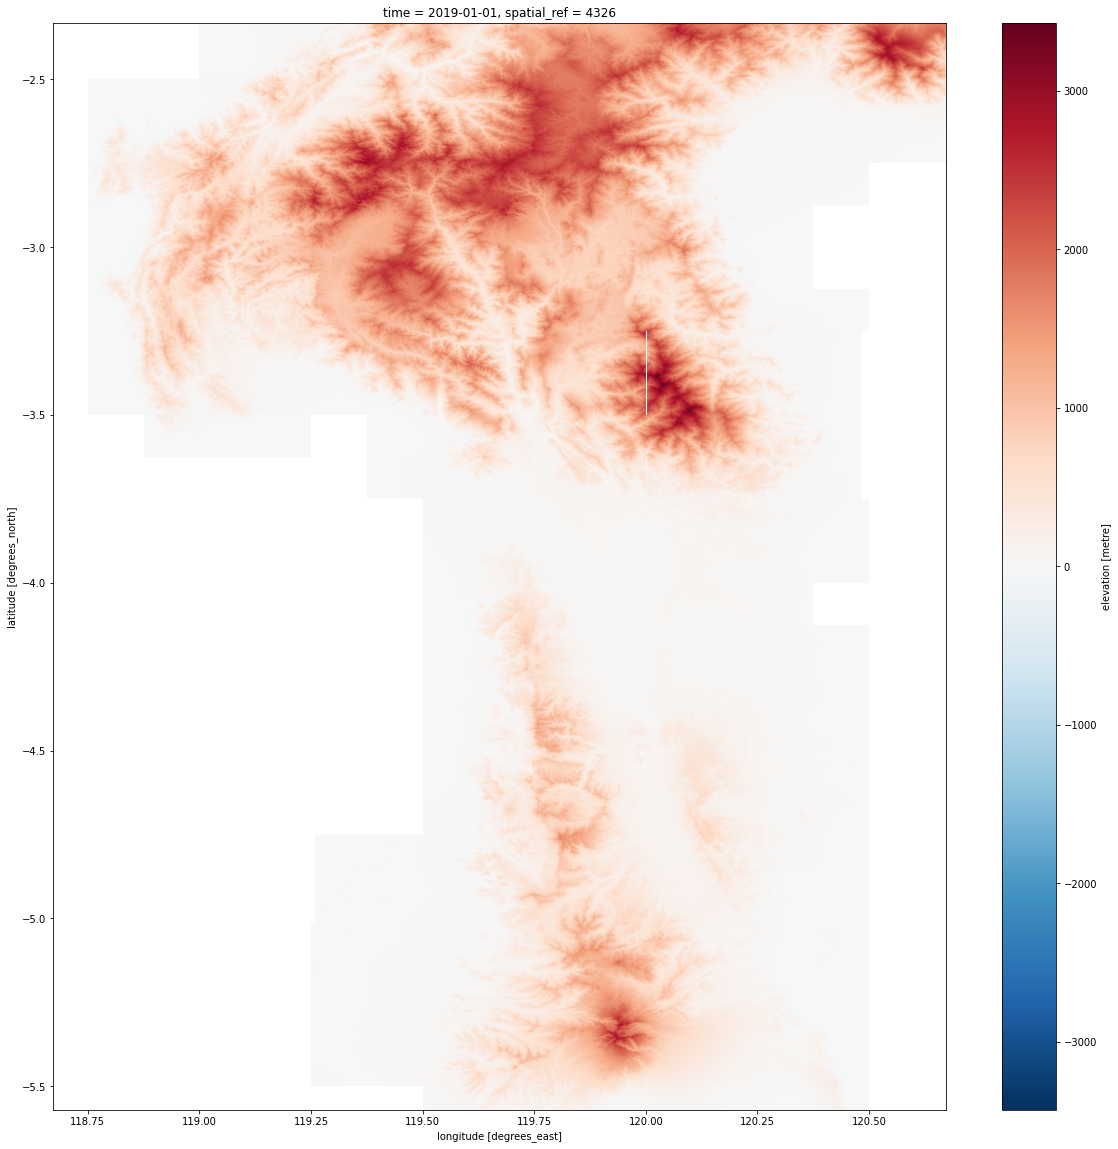

In [22]:
dem.elevation.squeeze().where(dem.elevation >= -100).plot(figsize=(20, 20));

In [23]:
# Broader region
longitude = (119.570582, 120.041621)
latitude = (-4.466466, -3.882999)

In [24]:
# Ignore shapely deprecation warnings. To be removed at next image update
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

from os import environ
from cartopy.crs import PlateCarree
from datacube import Datacube
from datashader import reductions
import holoviews as hv
import hvplot.xarray
import matplotlib.pyplot as plt

elevation = dem.elevation.squeeze()
elevation.persist();

options = {
    'title': 'Elevation',
    'width': 800,
    'height': 500,
    'aspect': 'equal',
    'cmap': plt.cm.terrain,
    'clim': (0, elevation.max().values.item()),    # Limit the color range depending on the layer_name
    'colorbar': True,
    'tools': ['hover'],
}
plot_crs = PlateCarree()
elevation.hvplot.image(
     x = 'longitude', y = 'latitude',         # Dataset x,y dimension names 
     crs = plot_crs,
     rasterize = True,                        # If False, data will not be reduced. This is slow to load but all data is loaded.
     aggregator = reductions.mean(),          # Datashader calculates the mean value for reductions (also first, min, max, las, std, mode)
     precompute = True,                       # Datashader precomputes what it can
    ).opts(**options).hist(bin_range = options['clim'])

distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

:AdjointLayout
   :DynamicMap   []
      :Image   [longitude,latitude]   (elevation)
   :DynamicMap   []
      :Histogram   [elevation]   (elevation_count)